In [1]:
import sys

print(sys.version)
import os
print(os.path.abspath('.'))
%matplotlib inline 
import io 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib 
import matplotlib.pyplot as plt 

matplotlib.rcParams['figure.figsize'] = (16.0, 14.0) 
matplotlib.style.use('ggplot') 

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
D:\liing\Mynote\notebook\mycode


参考资料：  
[统计学中常见的概率密度图像](https://idmatlab.blog.csdn.net/article/details/82285474)   
[概率密度函数](https://blog.csdn.net/az9996/article/details/102703057)   
[概率密度函数的求解](https://blog.csdn.net/jiaoyangdetian/article/details/82221163)   
[计算(分析\画出)给定数据的分布(概率密度函数)](https://blog.csdn.net/ying86615791/article/details/103391083)   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   

## 1、正态分布
　　在统计学发展历史中，正态分布有着非常重要的地位，因为它允许从数学上近似不确定性和变异性。　　
　　虽然原始数据通常并不符合正态分布，但误差通常是符合正态分布的，对于大规模样本的均值和总数，也是一样的。　　
　　要将数据转换为z分数，需要减去数据的均值，再除以标准偏差。这样，所生成的数据才可以与正态分布进行对比。　　
　　标准化：标准化（也称为归一化），通过减去均值并除以标准偏差，将所有变量置于同一尺度。该方式避免了变量的原始测量规模对模型产生过度的影响。　　
　　我们一般称如上的标准化的值为z分数。这时，测量值可以用“偏离均值的标准偏差”表示，这样，变量对模型的影响就不会受到原始变量规模的影响。　　



norm.pdf(x, mu, sigma)　　　# 概率密度函数：返回N(mu,sigma^2)的概率密度函数在 x 处的值  
norm.cdf(x, mu, sigma)　　　# 概率分布函数：返回N(mu,sigma^2)的概率密度函数在 负无穷 到 x 上的积分，也就是概率分布函数的值  
norm.sf(x, mu, sigma)　　　# 返回 1 - norm.cdf(x, mu, sigma^2)  
norm.expect( func = f, loc = mu, scale = sigma )　　　# 数学期望：返回f(x)的期望，注意这里的loc和scale  
norm.isf(1-alpha, mu, sigma)　　　# 分位数：返回值s满足：norm.cdf(s, mu, sigma^2) = alpha，s就是alpha分位数  
norm.ppf(alpha, mu, sigma)　　　# 返回值s满足：norm.cdf(s, mu, sigma^2) = alpha，s就是alpha分位数  
norm.fit(a) 　　　# 最大似然估计：假定数组a来自正态分布，返回mu和sigma的最大似然估计。感觉结果不咋地。。  
norm.mean(mu,sigma)　　　# N(mu,sigma^2) 的均值  
norm.var(mu,sigma)　　　# N(mu,sigma^2) 的方差  
norm.std(mu,sigma)　　　# N(mu,sigma^2) 的方差再开平方根  
norm.median(mu,sigma)　　　# N(mu,sigma^2) 的中位数  
norm.moment(a,mu,sigma)　　　# N(mu,sigma^2) 的 a 阶原点矩  
norm.rvs(loc = mu,scale = sigma, size = N)　　　# 产生满足正态分布的随机数：产生N个服从N(mu,sigma^2)的随机数  

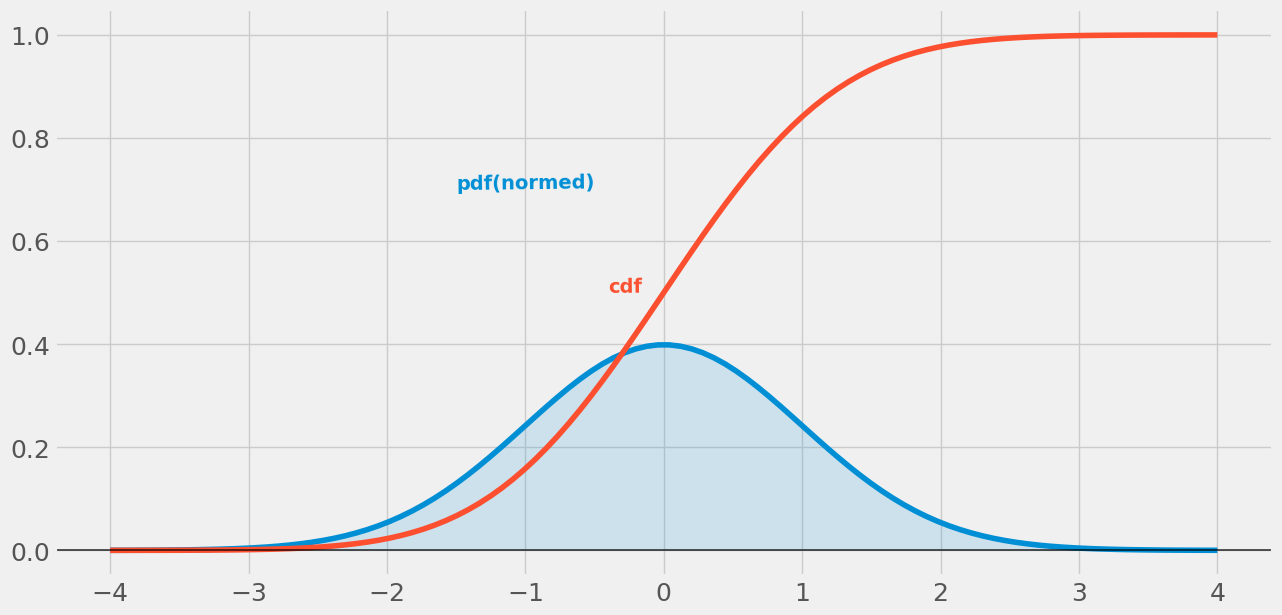

In [9]:
#导入工具包
from scipy.stats import norm  #该模块包含了所有的统计分析函数
from  matplotlib import style
from IPython.core.display import HTML

#PLOTTING CONFIG 绘图配置
%matplotlib inline
style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(14,7)
plt.figure(dpi=100)

#PDF 概率密度函数 
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100))) #从（-4，4）中随机选取100个数，绘制该事件的概率密度函数
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)),alpha=.15)#对曲线内部进行填充

#CDF 累积概率密度函数 
plt.plot(np.linspace(-4,4,100),norm.cdf(np.linspace(-4,4,100))) #cdf函数表示之前的概率累积的结果，-4处为0，4处为1

#LEGEND 图例
plt.text(x=-1.5,y=0.7,s="pdf(normed)",rotation=.65,weight="bold",color="#008fd5")
plt.text(x=-0.4,y=0.5,s="cdf",rotation=.65,weight="bold",color="#fc4f30")

#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)

# 从结果图可以看出pdf是一个标准的正态分布曲线，均值为0，方差为1，符合该事件的规律。



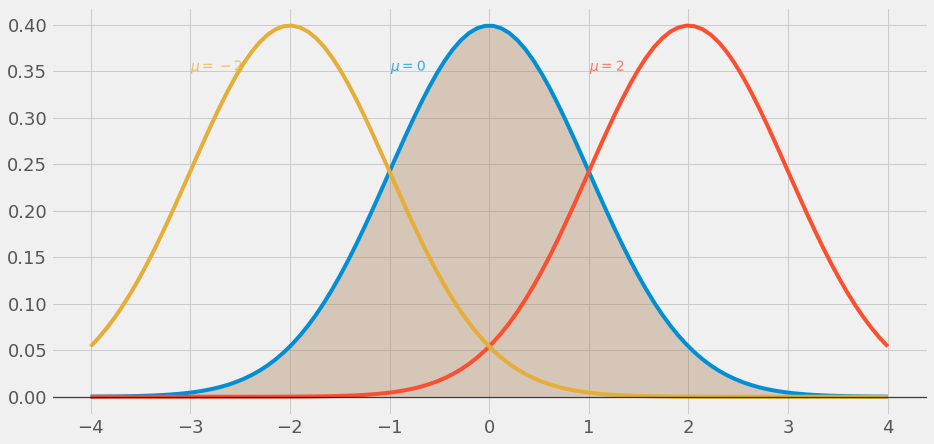

In [11]:
#不同的均值绘制出来的正态分布曲线形状也不同

#PDF  MU默认为0时
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)),alpha=.15)

#PDF MU=2时
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),loc=2))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)),alpha=.15)

#PDF MU=-2时
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),loc=-2))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)),alpha=.15)

#LEGEND 图例
plt.text(x=-1,y=.35,s="$ \mu=0$",rotation=.65,alpha=.75,weight="bold",color="#008fd5")
plt.text(x=1,y=.35,s="$ \mu=2$",rotation=.65,alpha=.75,weight="bold",color="#fc4f30")
plt.text(x=-3,y=.35,s="$ \mu=-2$",rotation=.65,alpha=.75,weight="bold",color="#e5ae38")

#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)


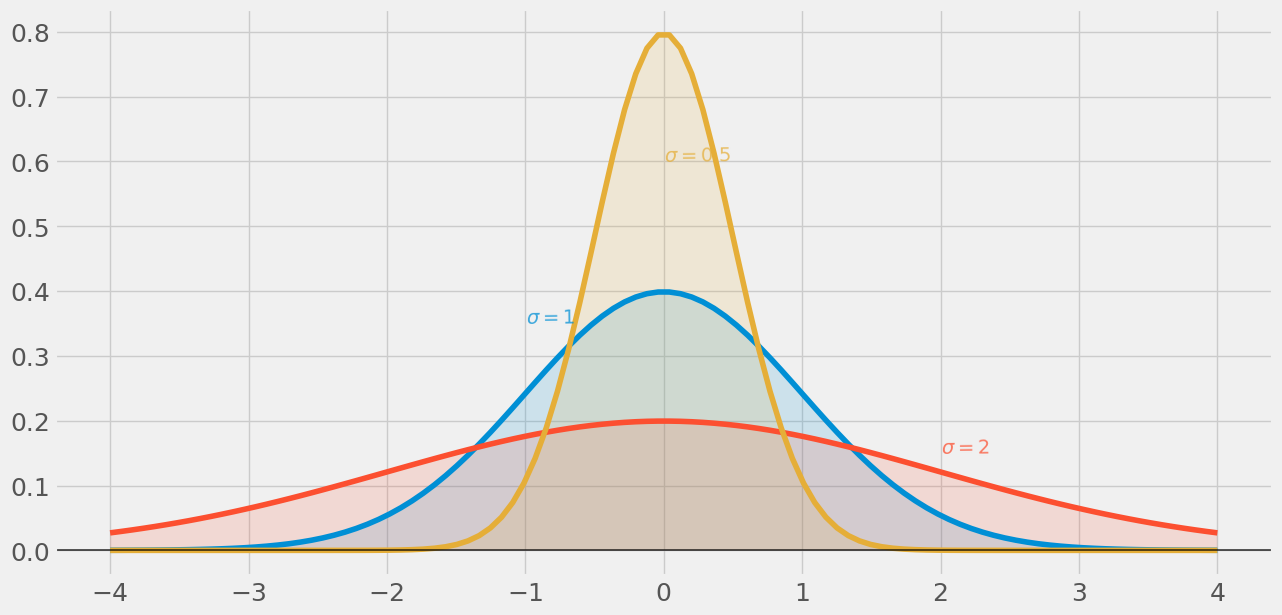

In [10]:
#当标准差不同时，正态分布曲线的形状也不同
plt.figure(dpi=100)

#PDF SIGMA=1
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=1))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=1),alpha=.15)

#PDF SIGMA=1
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=2))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=2),alpha=.15)

#PDF SIGMA=1
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=0.5))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=0.5),alpha=.15)

#LEGEND 图例
plt.text(x=-1,y=.35,s="$ \sigma=1$",rotation=.65,alpha=.75,weight="bold",color="#008fd5")
plt.text(x=2,y=.15,s="$ \sigma=2$",rotation=.65,alpha=.75,weight="bold",color="#fc4f30")
plt.text(x=0,y=.6,s="$ \sigma=0.5$",rotation=.65,alpha=.75,weight="bold",color="#e5ae38")

#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)

# 只有标准差不同时，标准差越大，正态分布曲线越平缓，标准差越小，正态分布曲线越陡。

-1.6059758862548896

[-1.60549343 -0.13535798 -0.39263531  0.78400205 -0.58892965  0.28967969
  0.06218773 -1.33025472  0.13253773 -1.03334253]

1.0234861889336746

pdf(x)= 0.24197072451914337
pdf(y)= 0.05399096651318806
P(x<0.3)=0.6179114221889526
P(-0.2<x<0.2)=0.15851941887820603


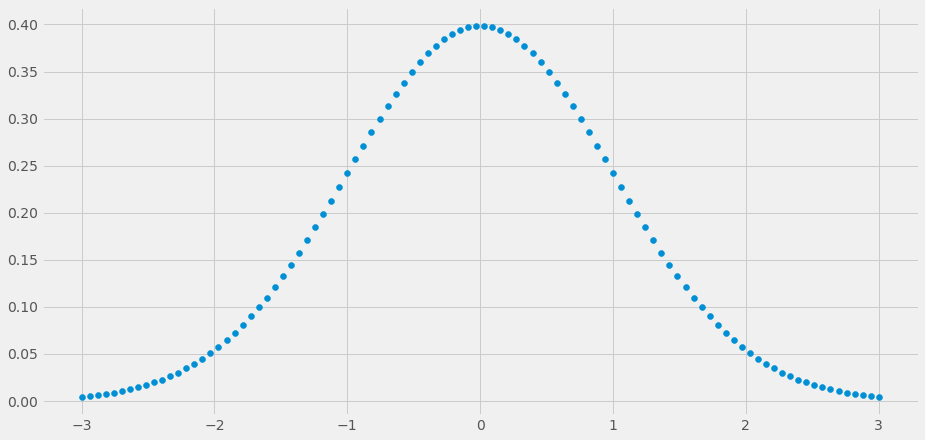

In [14]:
#获取正态分布的随机几个样本：可以使用norm.rvs()其中默认均值=0,方差=1,也可以自己指定。

#获得1个正态分布的随机样本
print(norm.rvs(),end="\n\n")

#获得10个正态分布的随机样本
print(norm.rvs(size=10),end="\n\n")

#自己指定均值和方差
print(norm.rvs(loc=1,scale=0.1),end="\n\n")

# PDF 概率密度函数 （Probability Density Function）
# **#随机变量X、Y的相对概率**
x = -1
y = 2
print("pdf(x)= {}\npdf(y)= {}".format(norm.pdf(x),norm.pdf(y)))

#绘制连续的概率密度曲线
x_s=np.linspace(-3,3,100)
y_s=norm.pdf(x_s)
plt.scatter(x_s,y_s)

# CDF 累积概率密度函数 （Cumnlative Probability Density Function） 可以指定一个范围求累积概率密度
 
#X小于0.3的概率密度之和
print("P(x<0.3)={}".format(norm.cdf(0.3)))

#X大于-0.2，小于0.2的概率密度之和
print("P(-0.2<x<0.2)={}".format(norm.cdf(0.2)-norm.cdf(-0.2)))


## 2、泊松分布 (Poisson Distribution)
　　通俗定义：假定一个事件，在一段时间内随即发生，且概率符合以下条件： 1.将该时间段分割成若干个小的时间段，在这个接近于0的小时间段里，该事件发生一次的概率与该小时间段的长度成正比。 2.在每个极小时间段内，该事件连续发生两次以上的概率恒等于0. 3.该事件在不同的小时间段里，发生与否相互独立。则该事件符合泊松分布。 泊松分布使用了以下符号： λ是事件发生的速率，t是时间间隔的长，X是该时间间隔内发生的事件数，其中X是泊松随机变量，X的分布称为泊松分布，令μ表示t时间间隔内平均发生的事件数，则μ=λ\*t。    


Text(8.5, 0.9, 'cdf')

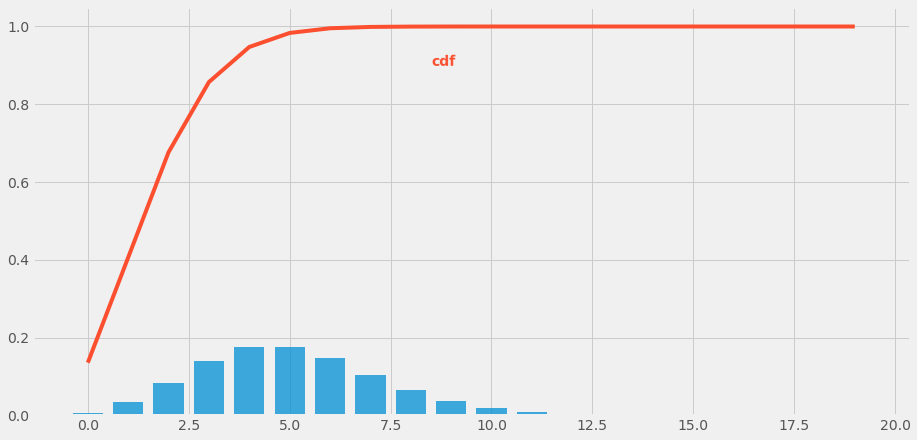

In [22]:
#泊松分布——绘图
from scipy.stats import poisson
from matplotlib import style

#PDF 绘制泊松分布的概率密度函数
plt.bar(np.arange(20),height=(poisson.pmf(np.arange(20),mu=5)),width=0.75,alpha=0.75)
#CDF 绘制泊松分布的累计概率曲线
plt.plot(np.arange(20),poisson.cdf(np.arange(20),mu=2),color="#fc4f30")

#LEGEND 图例
# plt.text(x=8,y=0.45,s="pmf(poisson)",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=8.5,y=0.9,s="cdf",rotation=.75,weight="bold",color="#fc4f30")


Text(14.5, 0.06, '$λ=10$')

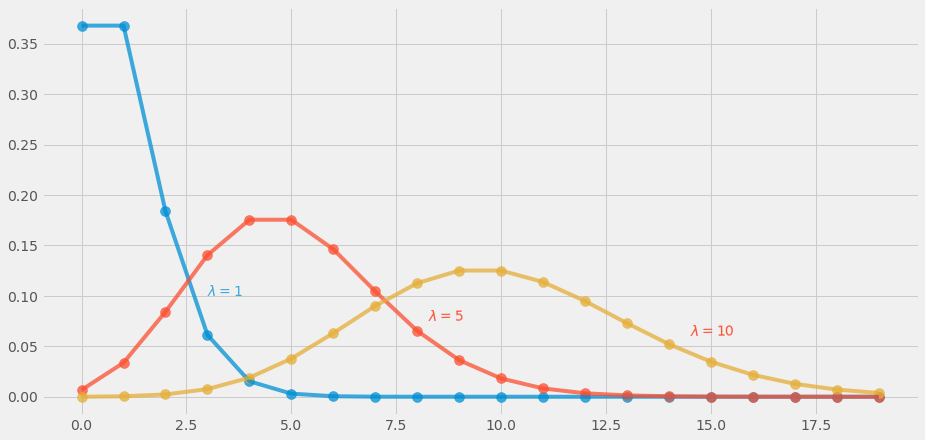

In [18]:
# PDF λ=1
plt.scatter(np.arange(20), poisson.pmf(np.arange(20),mu=1),alpha=0.75,s=100)
plt.plot(np.arange(20), poisson.pmf(np.arange(20),mu=1),alpha=0.75)

#PDF λ=5
plt.scatter(np.arange(20), poisson.pmf(np.arange(20),mu=5),alpha=0.75,s=100)
plt.plot(np.arange(20), poisson.pmf(np.arange(20),mu=5),alpha=0.75)

#PDF λ=10
plt.scatter(np.arange(20), poisson.pmf(np.arange(20),mu=10),alpha=0.75,s=100)
plt.plot(np.arange(20), poisson.pmf(np.arange(20),mu=10),alpha=0.75)

#LEGEND 图例
plt.text(x=3,y=0.1,s="$λ=1$",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=8.25,y=0.075,s="$λ=5$",rotation=.75,weight="bold",color="#fc4f30")
plt.text(x=14.5,y=0.06,s="$λ=10$",rotation=.75,weight="bold",color="#fc4f30")


p(x<3)=0.2650259152973616
p(2<x<8)=0.8072543457950705


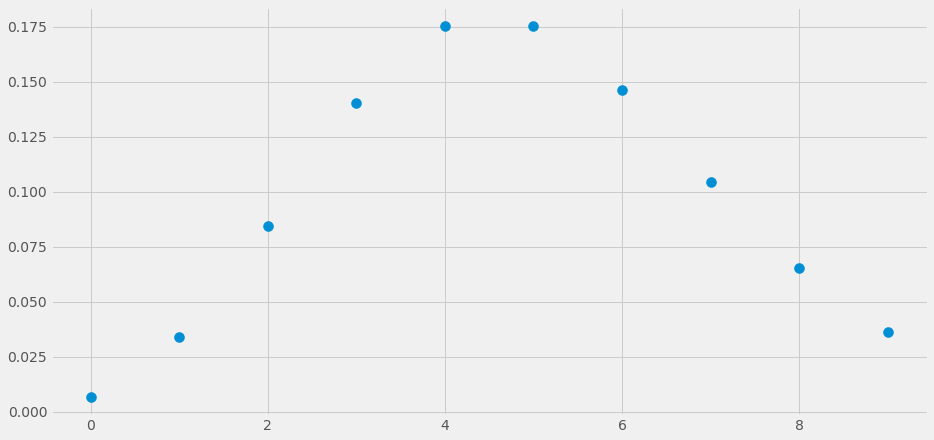

In [19]:
#绘制泊松分布的PMF曲线
x_s = np.arange(10)
y_s = poisson.pmf(k=x_s,mu=5)
plt.scatter(x_s,y_s,s=100)

#统计累积概率    CDF
#求事件发生次数小于3的概率
print("p(x<3)={}".format(poisson.cdf(k=3,mu=5)))

#求事件发生次数大于2小于8的概率
print("p(2<x<8)={}".format(poisson.cdf(k=8,mu=5)-poisson.cdf(k=2,mu=5)))


## 3、二项式分布
　　二项式分布就是只有两个可能结果的分布，比如成功或失败，抛一枚硬币的正反面， 两个可能结果的概率可以相等，也可以是不相等的，总和为1，例如如果成功的概率为0.2，那么失败的概率就是P=1-0.2=0.8. 每一次尝试都是独立的，因为前一次投掷的结果不能影响当前投掷的结果，只有两种可能结果且重复n次的试验叫做二项式，二项式的参数是 n和P，n是试验的总次数，P是试验的概率。
　　在上述说明的基础上，二项式的属性包括： 1.每个试验都是独立的。 2.实验中只有两个可能的结果：成功和失败。 3.总共进行了相同地n次实验。 4.所有实验成功和失败的概率是相同的。（所有实验都是相同的）
　　PMF （概率质量函数）对离散随机变量的定义，是离散随机变量在各个特定取值的概率。该函数通俗来说，就是对一个离散型概率事件来说，使用该函数来求它各个成功事件结果的概率。 PDF (概率密度函数） 是对连续型随机变量的定义，与PMF不同的是，在特定点上的值并不是该点的概率，连续随机概率事件只能求连续一段区域内发生事件的概率，通过对这段区间进行积分，可获得事件发生时间落在给定间隔内的概率。

Text(14.5, 0.9, 'cdf')

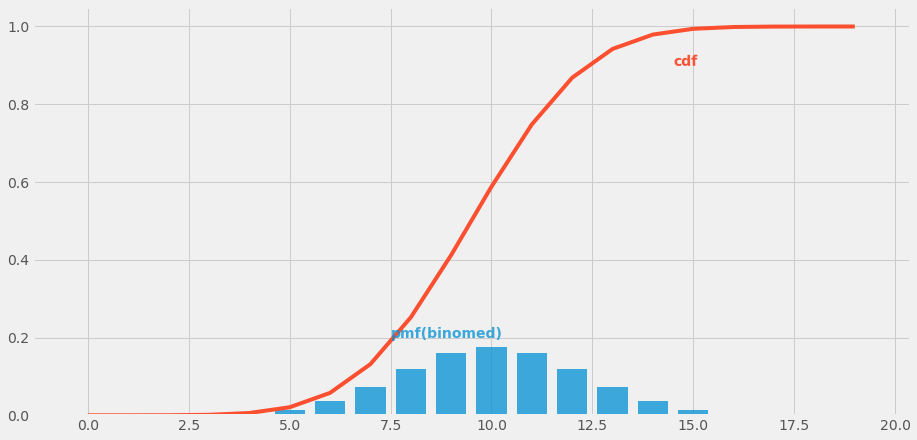

In [23]:
#导入需要的包
from scipy.stats import binom
from matplotlib import style

#PMF  绘制概率质量函数
plt.bar((np.arange(20)),height=(binom.pmf(np.arange(20),p=0.5,n=20)),width=0.75,alpha=0.75) #binom.pmf为二项式的概率质量数
#n=20,P=0.5,绘制成柱形图

#CDF
plt.plot(np.arange(20),binom.cdf(np.arange(20),p=0.5,n=20),color="#fc4f30") #绘制该二项式的累积密度函数曲线

#LEGEND 图例
plt.text(x=7.5,y=0.2,s="pmf(binomed)",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=14.5,y=0.9,s="cdf",rotation=.75,weight="bold",color="#fc4f30")


Text(17.5, 0.075, '#p=0.9')

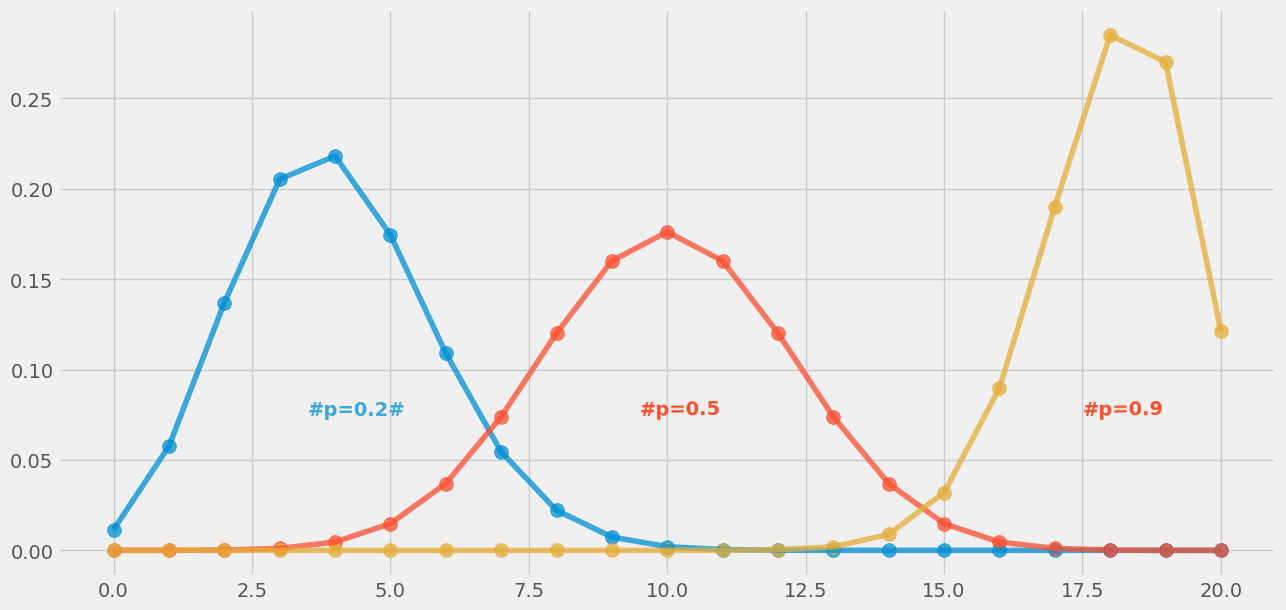

In [24]:
plt.figure(dpi=100)

#PDF P=0.2
plt.scatter(np.arange(21),stats.binom.pmf(np.arange(21),p=0.2,n=20),alpha=0.75,s=100)
plt.plot(np.arange(21),stats.binom.pmf(np.arange(21),p=0.2,n=20),alpha=0.75)

#PDF P=0.5
plt.scatter(np.arange(21),stats.binom.pmf(np.arange(21),p=0.5,n=20),alpha=0.75,s=100)
plt.plot(np.arange(21),stats.binom.pmf(np.arange(21),p=0.5,n=20),alpha=0.75)

#PDF P=0.9
plt.scatter(np.arange(21),stats.binom.pmf(np.arange(21),p=0.9,n=20),alpha=0.75,s=100)
plt.plot(np.arange(21),stats.binom.pmf(np.arange(21),p=0.9,n=20),alpha=0.75)

#LEGEND 图例
plt.text(x=3.5,y=0.075,s="#p=0.2#",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=9.5,y=0.075,s="#p=0.5",rotation=.75,weight="bold",color="#fc4f30")
plt.text(x=17.5,y=0.075,s="#p=0.9",rotation=.75,weight="bold",color="#fc4f30")



Text(10, 0.175, '$N=0.9$')

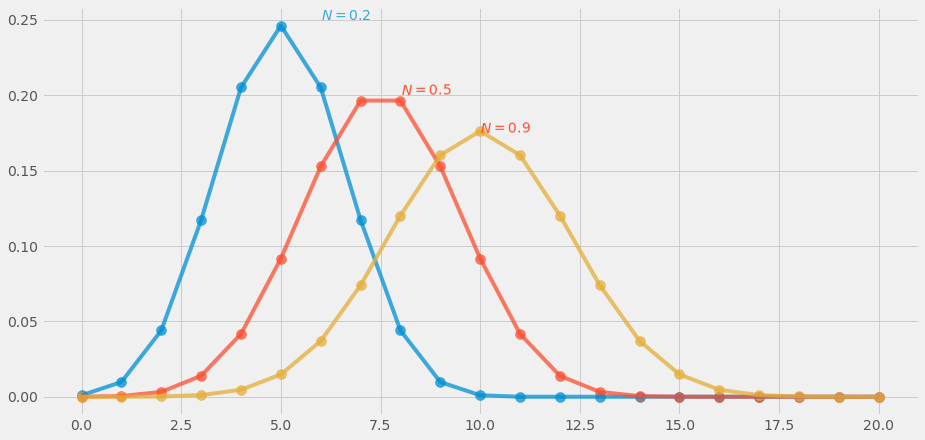

In [25]:
#PDF N=10
plt.scatter(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=10),alpha=0.75,s=100)
plt.plot(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=10),alpha=0.75)

#PDF N=15
plt.scatter(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=15),alpha=0.75,s=100)
plt.plot(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=15),alpha=0.75)

#PDF N=20
plt.scatter(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=20),alpha=0.75,s=100)
plt.plot(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=20),alpha=0.75)

#LEGEND 图例
plt.text(x=6,y=0.25,s="$N=0.2$",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=8,y=0.2,s="$N=0.5$",rotation=.75,weight="bold",color="#fc4f30")
plt.text(x=10,y=0.175,s="$N=0.9$",rotation=.75,weight="bold",color="#fc4f30")

# 当N不同时，成功m次的可能性的最大值都出现在均值处，对应概率为n*p。

p(x=1)=0.12106082099999989
p(x=7)=0.12106082099999989
p(x<=3) = 0.6496107184000002
p(2< x <=8)=0.6170735277000002


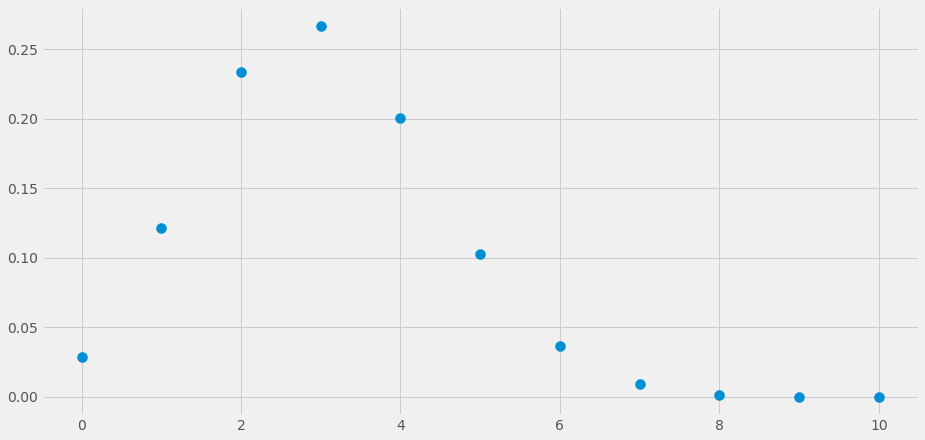

In [27]:
#绘制PMF
#随机变量x、y的概率
x=1
y=7
print("p(x=1)={}\np(x=7)={}".format(binom.pmf(k=x,p=0.3,n=10),stats.binom.pmf(k=x,p=0.3,n=10)))

#绘制二项式PMF
x_s=np.arange(11)
y_s=binom.pmf(k=x_s,p=0.3,n=10)
plt.scatter(x_s,y_s,s=100) #离散型随机变量用散点图

#统计累积概率    CDF

#求成功小于三次的概率
print("p(x<=3) = {}".format(binom.cdf(k=3,p=0.3,n=10)))

#求成功次数大于2次，小于8次的概率      
print("p(2< x <=8)={}".format(binom.cdf(k=8,p=0.3,n=10)- binom.cdf(k=2,p=0.3,n=10)))


## 4、卡方分布
　　通俗地说就是通过小数量的样本容量去估计总体容量的分布情况。 卡方检验就是统计样本的实际观测值与理论推断值的偏离程度。 卡方检验的基本思想就是根据样本数据推断总体的频次与期望频次是否有显著性差异。 
chi2.pdf()  
参数：
+ q :上下尾概率
+ x :分位数
+ loc :[可选]位置参数。默认值= 0
+ scale:[可选]比例参数。默认值= 1
+ size :[int型元组，可选]形状或随机变量。
+ moments:[可选]由字母['mvsk']组成； “ m” =均值，“ v” =方差，“ s” = Fisher的偏度，“ k” = Fisher的峰度。 (默认=“ MV”)。  
   
Results:卡方连续随机变量
<br>
概率密度函数：  
chi2.pdf(x, n)   　　　　# 返回\chi^2(n)的概率密度函数在 x 处的值  
概率分布函数：  
chi2.cdf(x, n)   　　　　# 返回\chi^2(n)的概率密度函数在 0 到 x 上的积分，也就是概率分布函数的值  
chi2.sf(x, n)   　　　　 # 返回 1 - chi2.cdf(x, n)  
数学期望：  
chi2.expect( func = f , args=(n,) )  # 返回f(x)的期望  
分位数：  
chi2.isf(1-alpha, n)　　　　# 返回值s满足：chi2.cdf(s, n) = alpha，  s就是alpha分位数  
chi2.ppf(alpha, n)　　　　 # 返回值s满足：chi2.cdf(s, n) = alpha，  s就是alpha分位数  
分布的数量关系：  
chi2.mean(n)     　　　　# \chi^2(n) 的均值  
chi2.var(n)      　　　　# \chi^2(n) 的方差  
chi2.std(n)     　　　　# \chi^2(n) 的方差再开平方根  
chi2.median(n)    　　　　# \chi^2(n) 的中位数  
chi2.moment(a,n) 　　　　# \chi^2(n) 的 a 阶原点矩  


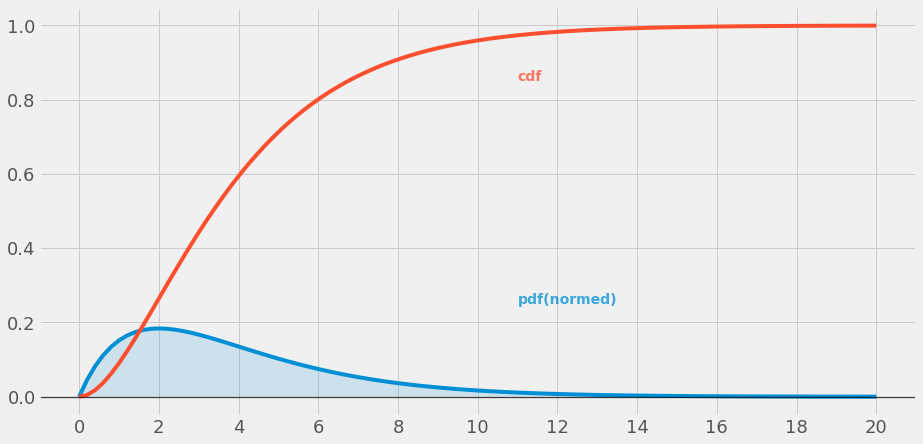

In [28]:
#卡方分布——画图
from scipy.stats import chi2
from matplotlib import style

#PDF  概率密度函数
plt.plot(np.linspace(0,20,100),chi2.pdf(np.linspace(0,20,100),df=4))#绘制0到20的卡方分布曲线,给定自由度为4
plt.fill_between(np.linspace(0,20,100),chi2.pdf(np.linspace(0,20,100),df=4),alpha=0.15) #填充曲线

#CDF 累积概率密度函数
plt.plot(np.linspace(0,20,100),chi2.cdf(np.linspace(0,20,100),df=4)) #绘制累积概率密度函数

#LEGEND 图例
plt.text(x=11,y=0.25,s="pdf(normed)",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=11,y=0.85,s="cdf",alpha=0.75,weight="bold",color="#fc4f30")

#Ticks 坐标轴
plt.xticks(np.arange(0,21,2))
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)


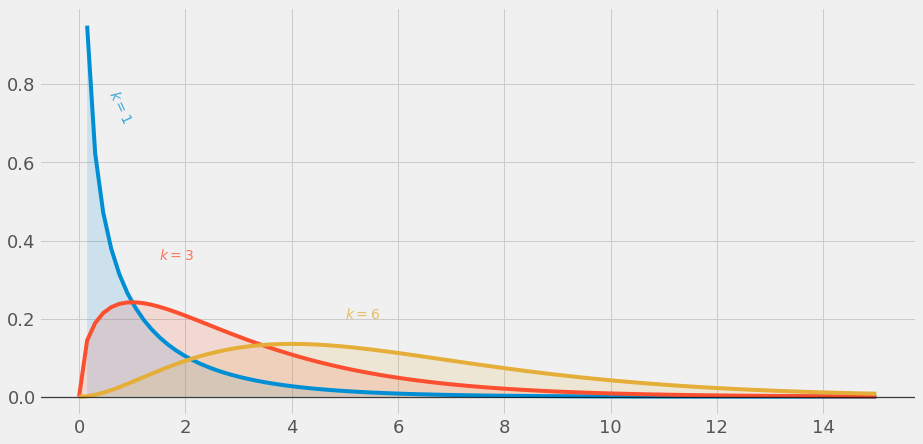

In [29]:
#探究自由度K大小对结果的影响：
#PDF    K=1
plt.plot(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=1))
plt.fill_between(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=1),alpha=0.15)

#PDF    K=3
plt.plot(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=3))
plt.fill_between(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=3),alpha=0.15)

#PDF    K=6
plt.plot(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=6))
plt.fill_between(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=6),alpha=0.15)


#LEGEND 图例
plt.text(x=0.5,y=0.7,s="$ k=1$",rotation=-65,alpha=.75,weight="bold",color="#008fd5")
plt.text(x=1.5,y=.35,s="$ k=3$",alpha=.75,weight="bold",color="#fc4f30")
plt.text(x=5,y=.2,s="$ k=6$",alpha=.75,weight="bold",color="#e5ae38")

#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)

# 可以看出K越大，图像越趋近于标准正态分布。

P(X<=3)=0.4421745996289252
P(2<X<=8)=0.4421745996289252


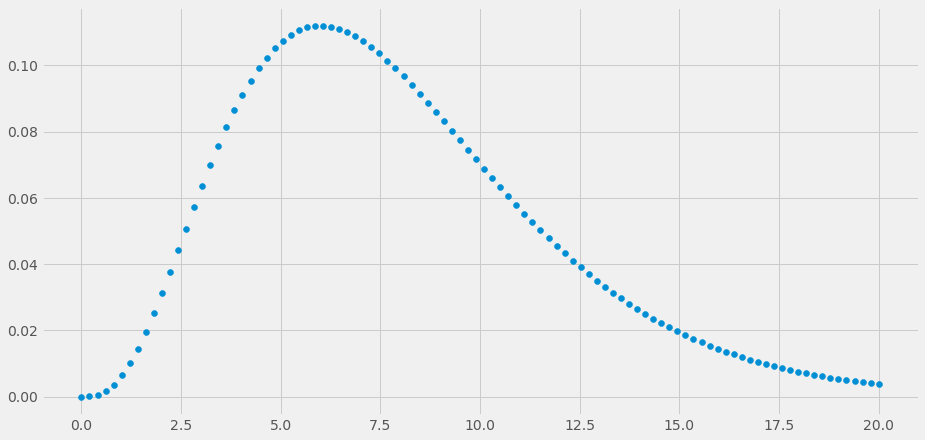

In [30]:
#绘制卡方分布曲线
x_s=np.linspace(0,20,100)
y_s=stats.chi2.pdf(x_s,df=8)
plt.scatter(x_s,y_s)


# CDF 累积概率密度函数 :（Cumnlative Probability Density Function） 可以指定一个范围求累积概率密度


#X<=3的概率密度之和
print("P(X<=3)={}".format(chi2.cdf(x=3,df=4)))
#2<X<=8的概率密度之和
print("P(2<X<=8)={}".format(chi2.cdf(x=3,df=4)))


## 5、均匀分布
定义：对于掷骰子来说或，结果为1到6，得到任何一个结果的概率都一样，这就是均匀分布，均匀分布得到的n个结果的可能性都相同，如果随机变量X是均匀分布的，则密度函数可以表示为： f(x)=1/b-a (b<x<a) 均匀分布的曲线是一个矩形，均匀分布又称为矩形分布。

Text(-0.4, 0.5, 'cdf')

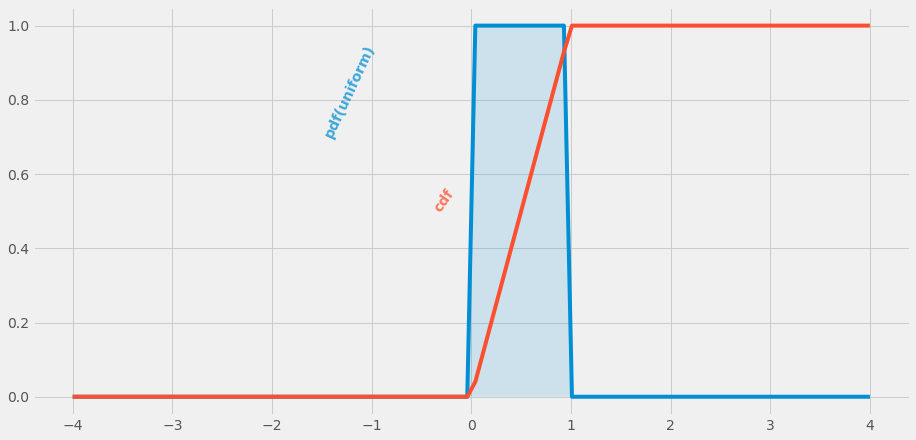

In [31]:
#绘图——均匀分布
from scipy.stats import uniform
from matplotlib import style

#PDF 
plt.plot(np.linspace(-4,4,100),uniform.pdf(np.linspace(-4,4,100)))
plt.fill_between(np.linspace(-4,4,100),uniform.pdf(np.linspace(-4,4,100)),alpha=0.15)

#CDF
plt.plot(np.linspace(-4,4,100),uniform.cdf(np.linspace(-4,4,100)))

#LEGEND 图例
plt.text(x=-1.5,y=0.7,s="pdf(uniform)",rotation=65,alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=-0.4,y=0.5,s="cdf",rotation=55,alpha=0.75,weight="bold",color="#fc4f30")



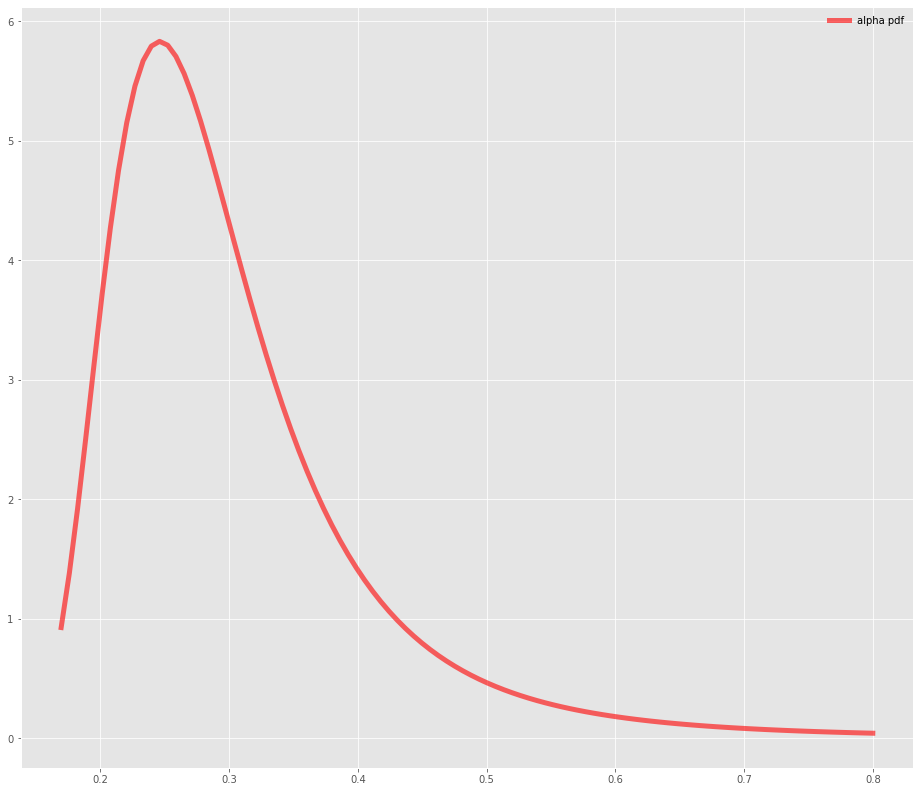

In [19]:
# alpha
from scipy.stats import alpha

fig, ax = plt.subplots(1, 1)
a = 3.57
mean, var, skew, kurt = alpha.stats(a, moments='mvsk')

x = np.linspace(alpha.ppf(0.01, a),
                alpha.ppf(0.99, a), 100)
ax.plot(x, alpha.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='alpha pdf')

ax.legend(loc='best', frameon=False)
plt.show()

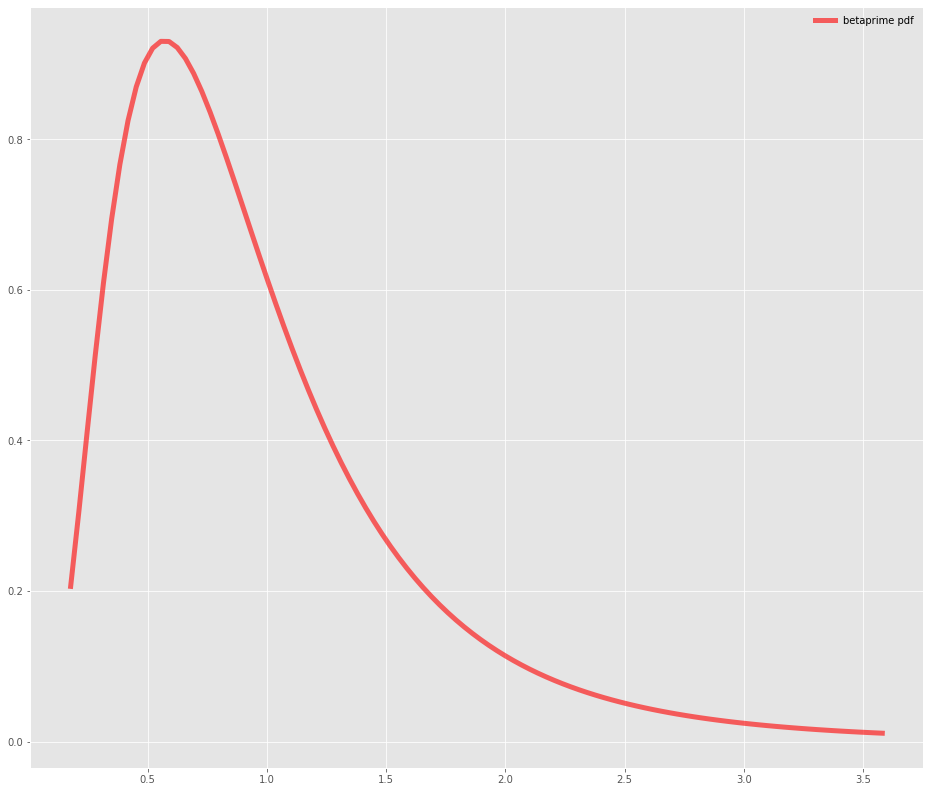

In [28]:
# 贝塔素数连续随机变量。
from scipy.stats import betaprime

fig, ax = plt.subplots(1, 1)
# betaprime(a=5.00, loc=0.00, scale=1.00, b=6.00)

a, b = 5, 6
mean, var, skew, kurt = betaprime.stats(a, b, moments='mvsk')
x = np.linspace(betaprime.ppf(0.01, a, b),
                betaprime.ppf(0.99, a, b), 100)
ax.plot(x, betaprime.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='betaprime pdf')
ax.legend(loc='best', frameon=False)
plt.show()

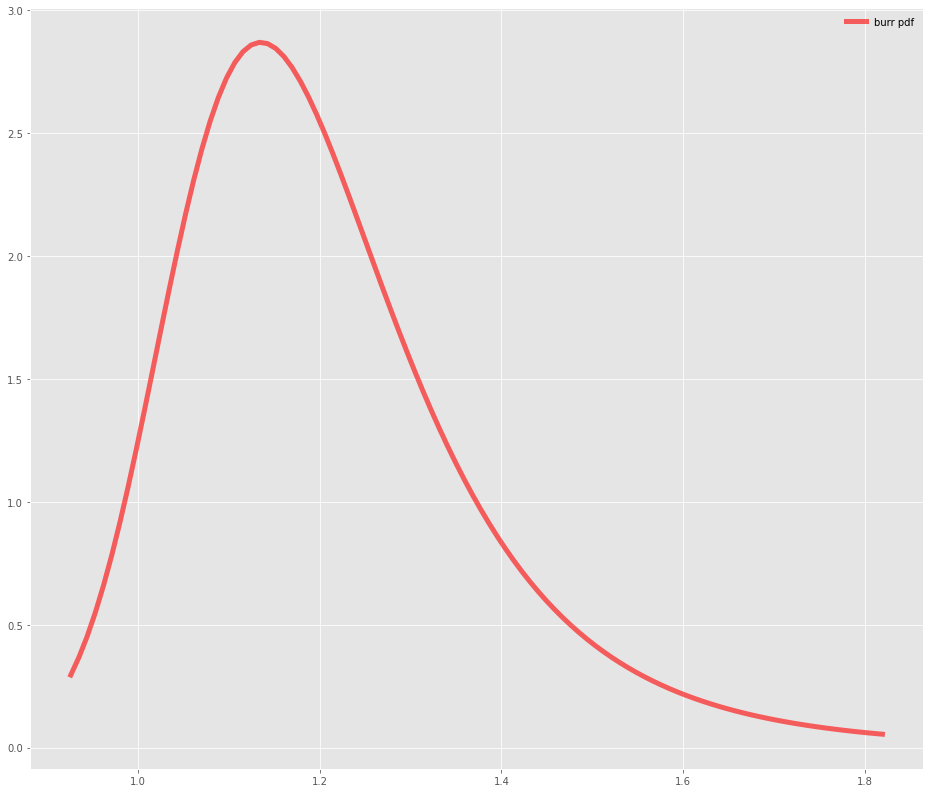

In [35]:
# Burr(III型)连续随机变量
from scipy.stats import burr

fig, ax = plt.subplots(1, 1)
c, d = 10, 4
mean, var, skew, kurt = burr.stats(c, d, moments='mvsk')

x = np.linspace(burr.ppf(0.01, c, d),
                burr.ppf(0.99, c, d), 100)
ax.plot(x, burr.pdf(x, c, d),
       'r-', lw=5, alpha=0.6, label='burr pdf')

ax.legend(loc='best', frameon=False)
plt.show()

In [36]:
# Erlang连续随机变量
from scipy.stats import erlang



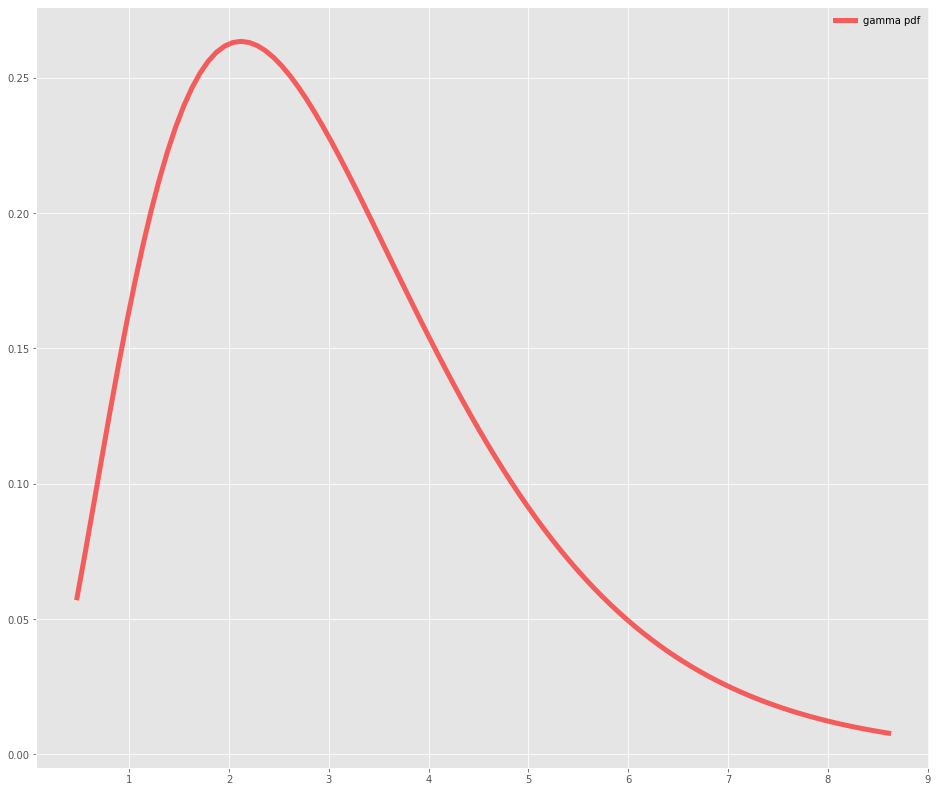

In [40]:
# gamma 分布
from scipy.stats import gamma

fig, ax = plt.subplots(1, 1)

a = 3.12
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')

x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

ax.legend(loc='best', frameon=False)
plt.show()

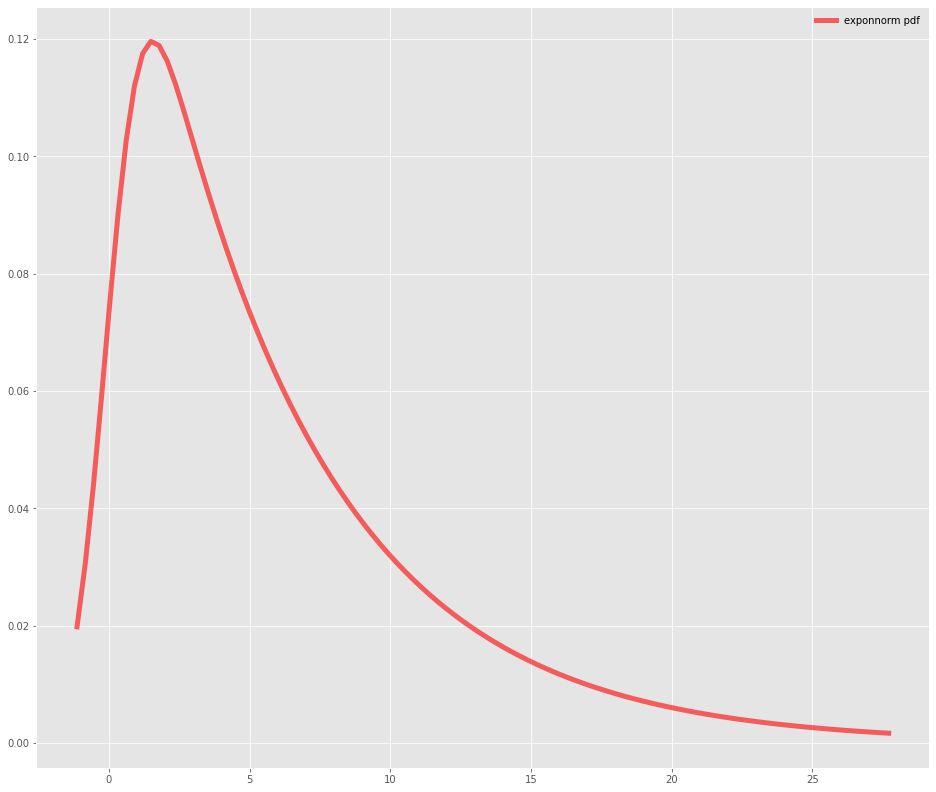

In [44]:
# 指数修正的正态连续随机变量
from scipy.stats import exponnorm

ig, ax = plt.subplots(1, 1)

K = 6
mean, var, skew, kurt = exponnorm.stats(K, moments='mvsk')

x = np.linspace(exponnorm.ppf(0.01, K),
                exponnorm.ppf(0.99, K), 100)
ax.plot(x, exponnorm.pdf(x, K),
       'r-', lw=5, alpha=0.6, label='exponnorm pdf')

ax.legend(loc='best', frameon=False)
plt.show()

## F分布
概率密度函数：  
f.pdf(x, m, n)     　　　　　 # 返回F(m,n)的概率密度函数在x处的值  
概率分布函数：  
f.cdf(x, m, n)      　　　　　# 返回F(m,n)的概率密度函数在0到x上的积分，也就是概率分布函数的值  
chi2.sf(x, n)       　　　　　# 返回 1 - f.cdf(x, m, n)  
数学期望：  
f.expect( func = g , args=(m, n) )　　　　# 返回g(x)的数学期望  
分位数：  
f.isf(1-alpha, m, n)　　　　　# 返回值s满足：chi2.cdf(s, n) = alpha，  s就是alpha分位数  
f.ppf(alpha, m, n)  　　　　　# 返回值s满足：chi2.cdf(s, n) = alpha，  s就是alpha分位数  
分布的数量关系：  
f.mean(m, n)       　　　　　 # F(m,n) 的均值  
f.var(m, n)         　　　　　# F(m,n) 的方差  
f.std(m, n)         　　　　　# F(m,n) 的方差再开平方根  
f.median(m, n)      　　　　　# F(m,n) 的中位数  
f.moment(a, m, n)  　　　　　 # F(m,n) 的 a 阶原点矩  

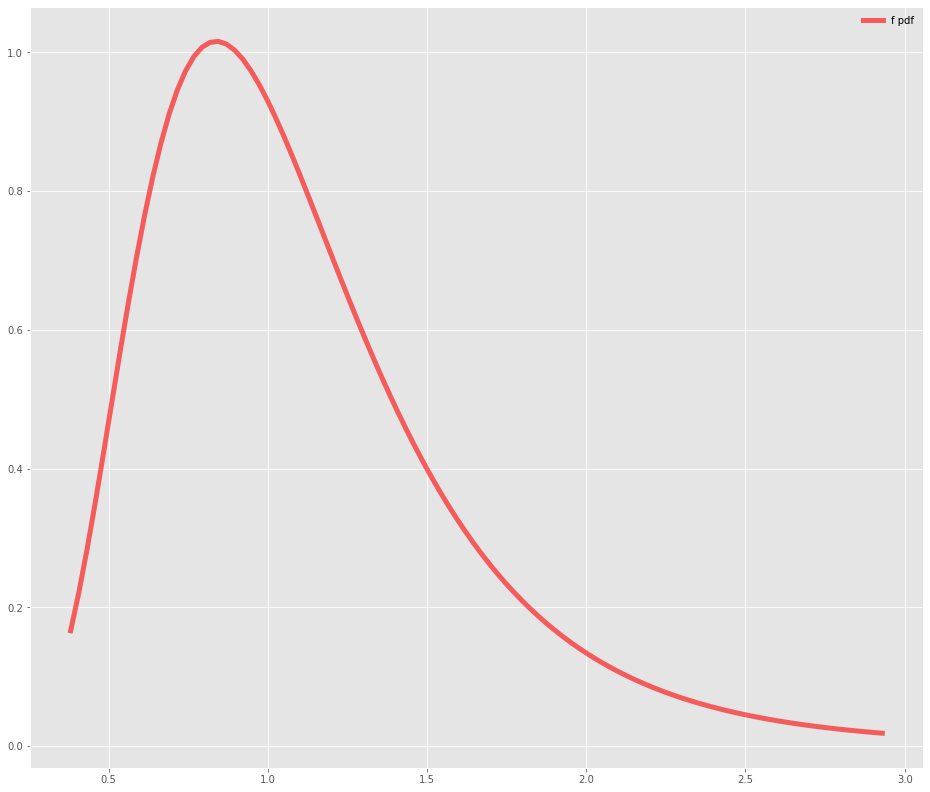

In [49]:
# F连续的随机变量
from scipy.stats import f
fig, ax = plt.subplots(1, 1)

dfn, dfd = 29, 18
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

ax.legend(loc='best', frameon=False)
plt.show()

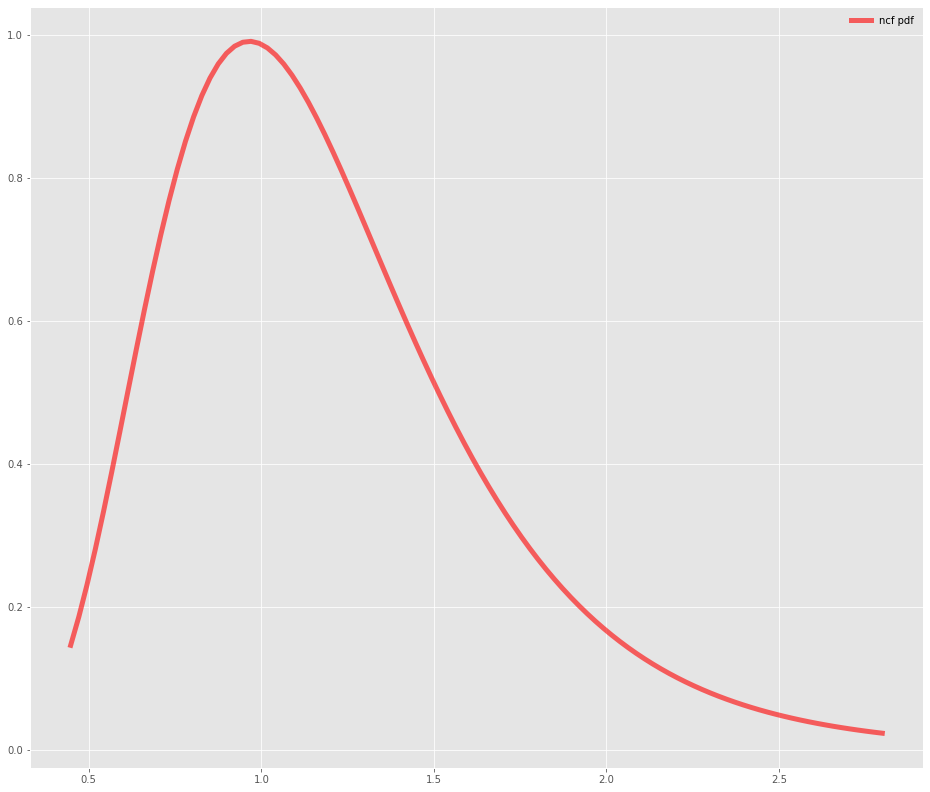

In [54]:
# 非中心F分布连续型随机变量。

from scipy.stats import ncf
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

dfn, dfd, nc = 27, 27, 3.2
mean, var, skew, kurt = ncf.stats(dfn, dfd, nc, moments='mvsk')

x = np.linspace(ncf.ppf(0.01, dfn, dfd, nc),
                ncf.ppf(0.99, dfn, dfd, nc), 100)
ax.plot(x, ncf.pdf(x, dfn, dfd, nc),
       'r-', lw=5, alpha=0.6, label='ncf pdf')

ax.legend(loc='best', frameon=False)
plt.show()

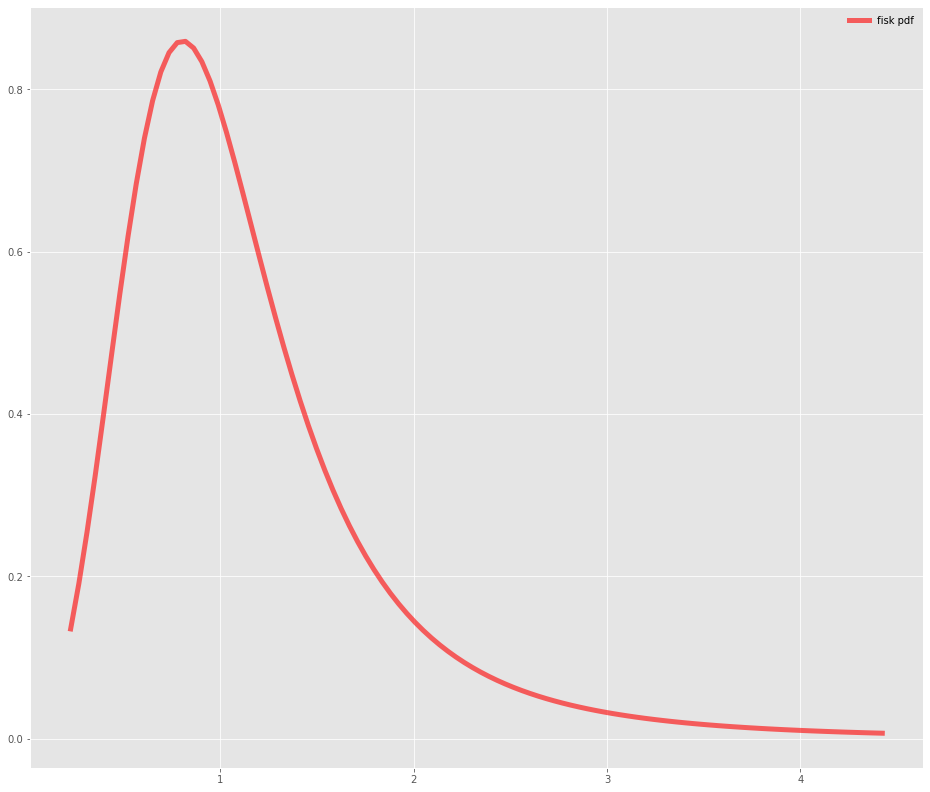

In [56]:
# FISK连续随机变量,也称为对数逻辑分布。

from scipy.stats import fisk
fig, ax = plt.subplots(1, 1)

c = 3.09
mean, var, skew, kurt = fisk.stats(c, moments='mvsk')

x = np.linspace(fisk.ppf(0.01, c),
                fisk.ppf(0.99, c), 100)
ax.plot(x, fisk.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='fisk pdf')

ax.legend(loc='best', frameon=False)
plt.show()

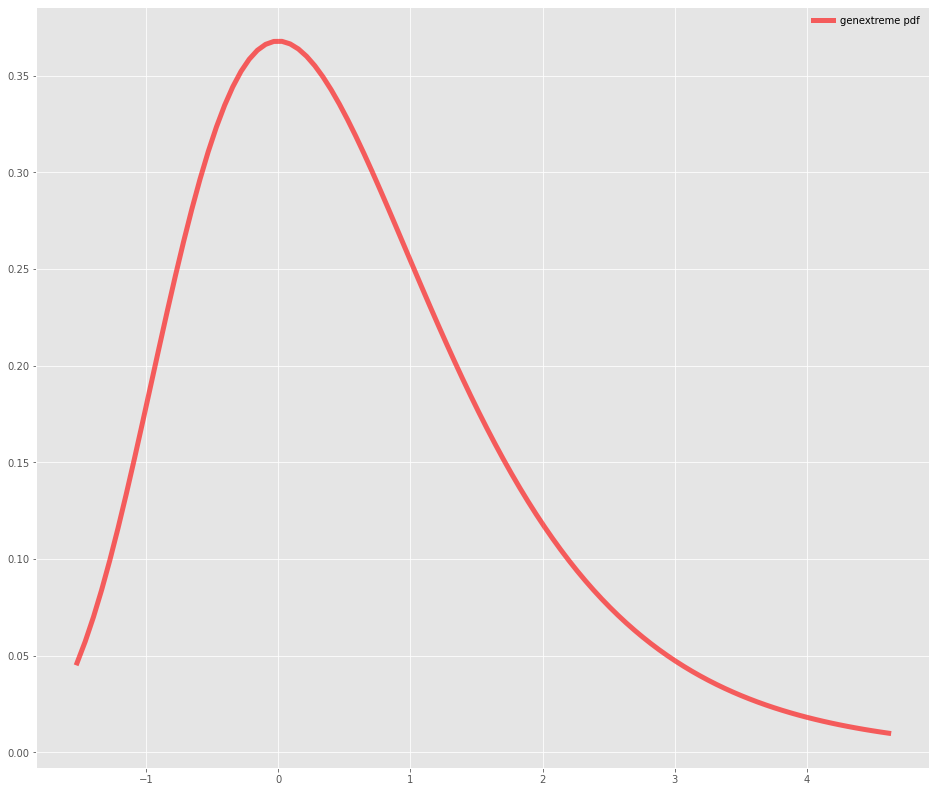

In [62]:
# 广义极值连续型随机变量。

from scipy.stats import genextreme
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = -0.002
mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')

x = np.linspace(genextreme.ppf(0.01, c),
                genextreme.ppf(0.99, c), 100)
ax.plot(x, genextreme.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='genextreme pdf')

ax.legend(loc='best', frameon=False)
plt.show()

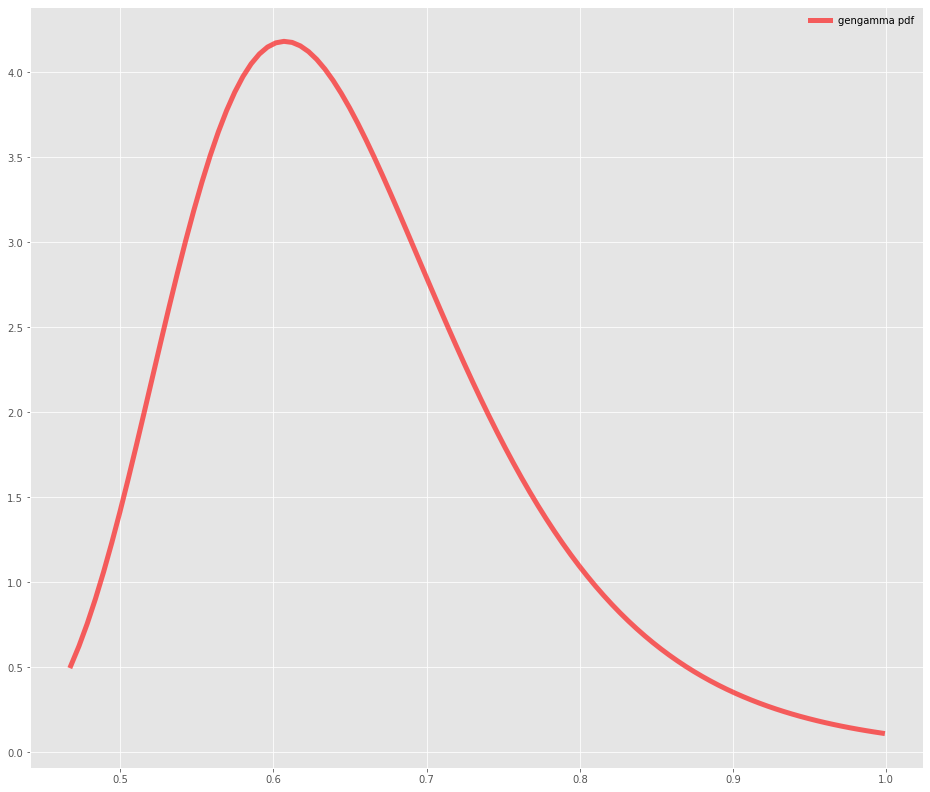

In [64]:
# 广义伽马连续随机变量。
from scipy.stats import gengamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a, c = 4.42, -3.12
mean, var, skew, kurt = gengamma.stats(a, c, moments='mvsk')

x = np.linspace(gengamma.ppf(0.01, a, c),
                gengamma.ppf(0.99, a, c), 100)
ax.plot(x, gengamma.pdf(x, a, c),
       'r-', lw=5, alpha=0.6, label='gengamma pdf')

ax.legend(loc='best', frameon=False)
plt.show()

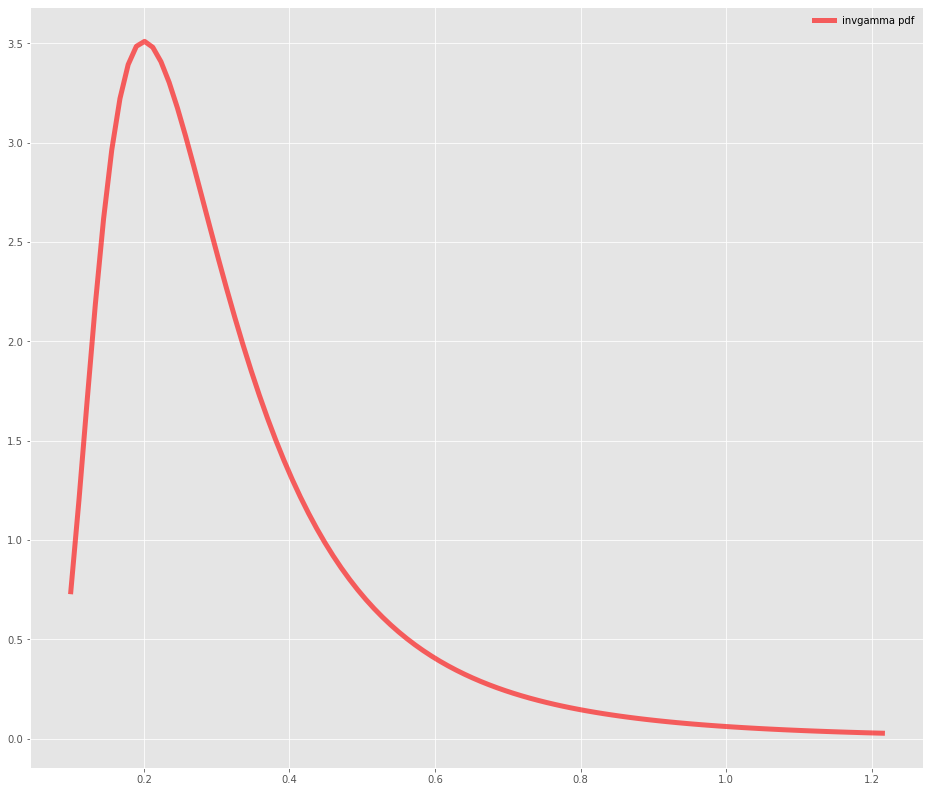

In [69]:
# 倒置的伽马连续随机变量。
from scipy.stats import invgamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a = 4
mean, var, skew, kurt = invgamma.stats(a, moments='mvsk')

x = np.linspace(invgamma.ppf(0.01, a),
                invgamma.ppf(0.99, a), 100)
ax.plot(x, invgamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='invgamma pdf')

ax.legend(loc='best', frameon=False)
plt.show()

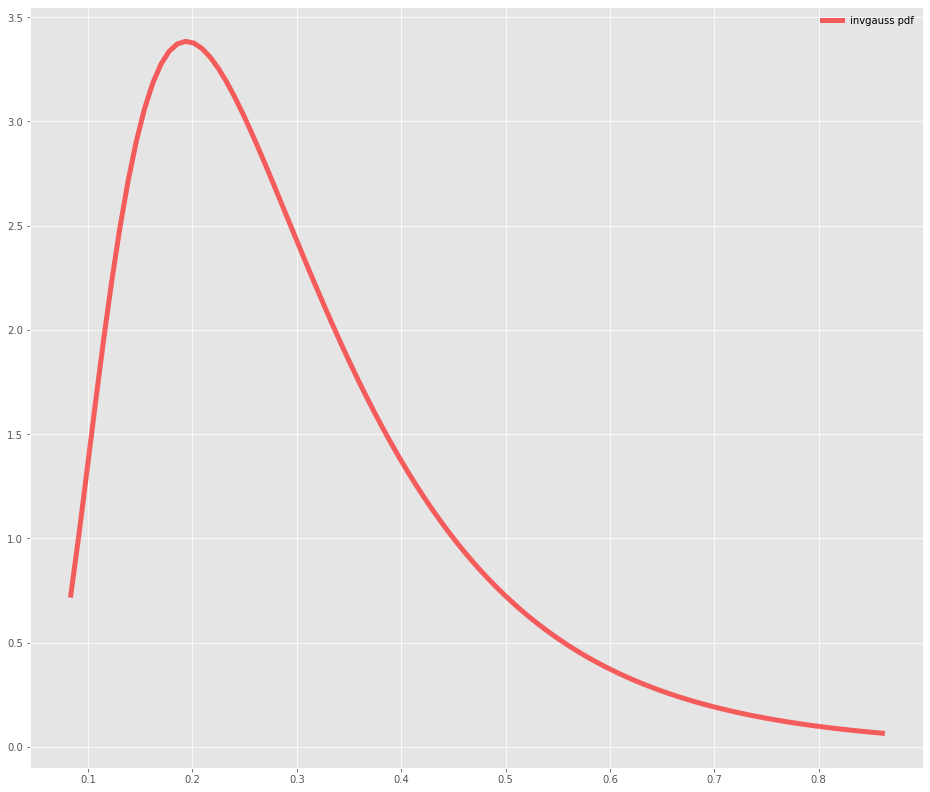

In [75]:
# 逆高斯连续随机变量。
from scipy.stats import invgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mu = 0.3
mean, var, skew, kurt = invgauss.stats(mu, moments='mvsk')

x = np.linspace(invgauss.ppf(0.01, mu),
                invgauss.ppf(0.99, mu), 100)
ax.plot(x, invgauss.pdf(x, mu),
       'r-', lw=5, alpha=0.6, label='invgauss pdf')

ax.legend(loc='best', frameon=False)
plt.show()

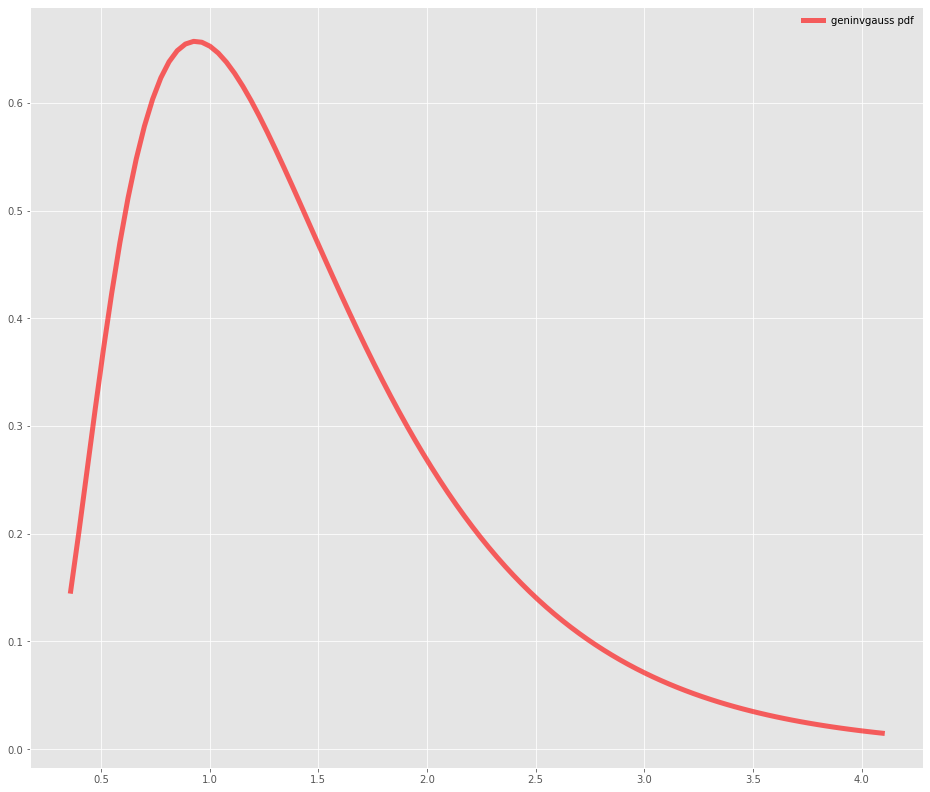

In [82]:
# 广义逆高斯连续随机变量。
from scipy.stats import geninvgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

p, b = 0.8, 3
mean, var, skew, kurt = geninvgauss.stats(p, b, moments='mvsk')

x = np.linspace(geninvgauss.ppf(0.01, p, b),
                geninvgauss.ppf(0.99, p, b), 100)
ax.plot(x, geninvgauss.pdf(x, p, b),
       'r-', lw=5, alpha=0.6, label='geninvgauss pdf')

ax.legend(loc='best', frameon=False)
plt.show()

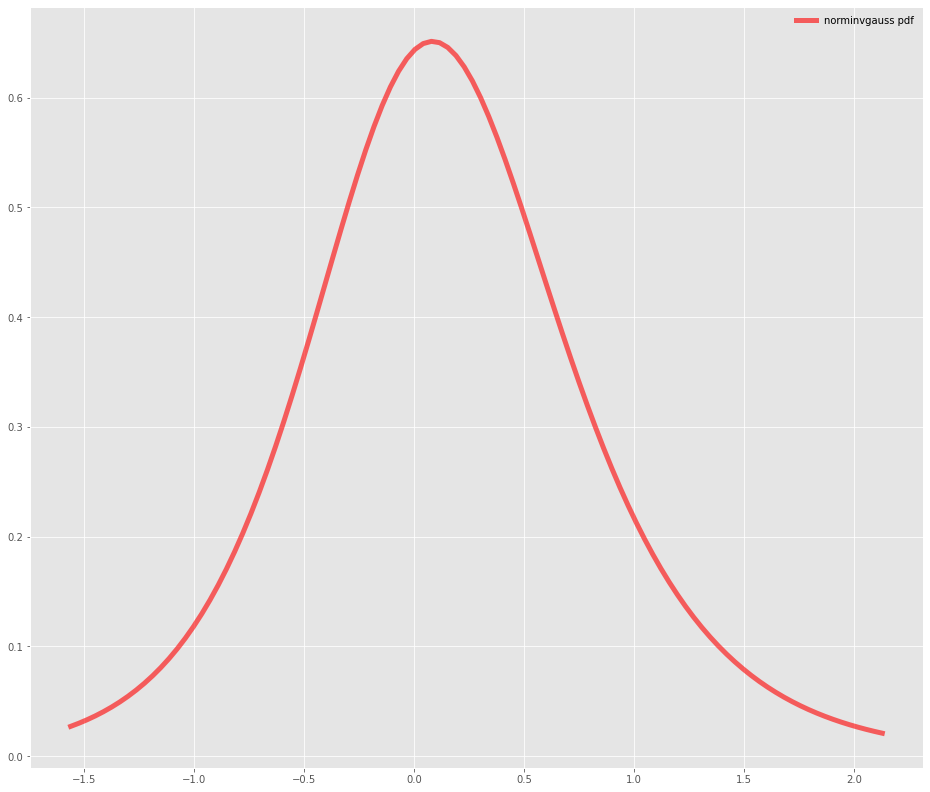

In [92]:
# 正态逆高斯连续随机变量。

from scipy.stats import norminvgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a, b = 2,0.3
mean, var, skew, kurt = norminvgauss.stats(a, b, moments='mvsk')

x = np.linspace(norminvgauss.ppf(0.01, a, b),
                norminvgauss.ppf(0.99, a, b), 100)
ax.plot(x, norminvgauss.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='norminvgauss pdf')

ax.legend(loc='best', frameon=False)
plt.show()

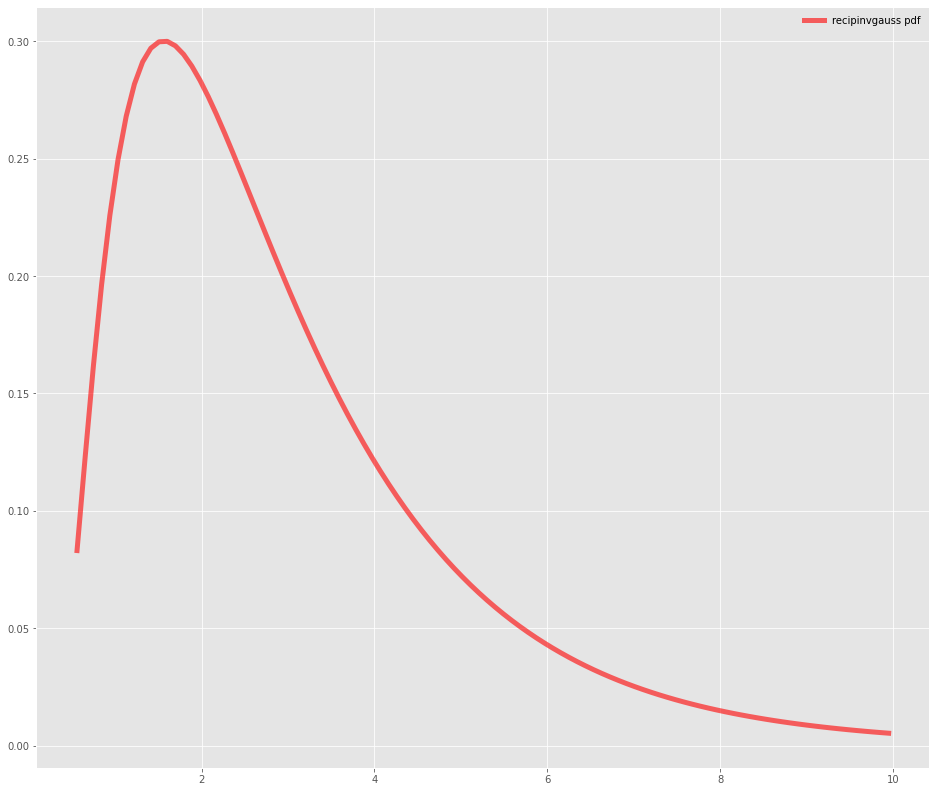

In [96]:
# 倒数逆高斯连续随机变量

from scipy.stats import recipinvgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mu = 0.5
mean, var, skew, kurt = recipinvgauss.stats(mu, moments='mvsk')

x = np.linspace(recipinvgauss.ppf(0.01, mu),
                recipinvgauss.ppf(0.99, mu), 100)
ax.plot(x, recipinvgauss.pdf(x, mu),
       'r-', lw=5, alpha=0.6, label='recipinvgauss pdf')

ax.legend(loc='best', frameon=False)
plt.show()

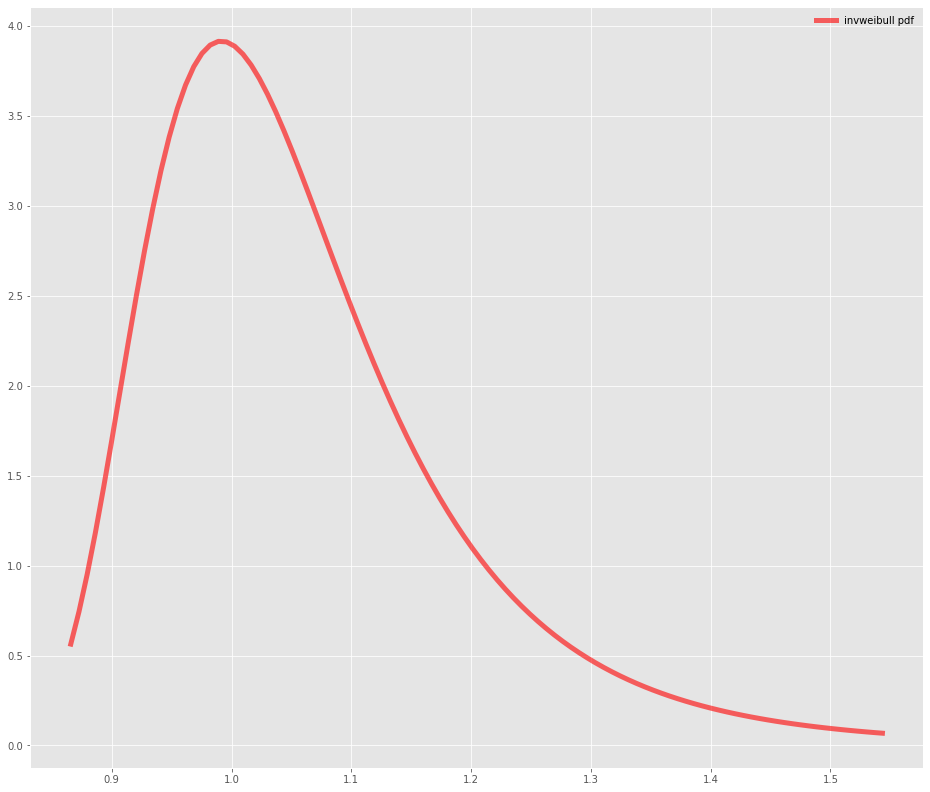

In [97]:
# 倒置的威布尔连续随机变量

from scipy.stats import invweibull
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = 10.6
mean, var, skew, kurt = invweibull.stats(c, moments='mvsk')

x = np.linspace(invweibull.ppf(0.01, c),
                invweibull.ppf(0.99, c), 100)
ax.plot(x, invweibull.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='invweibull pdf')

ax.legend(loc='best', frameon=False)
plt.show()

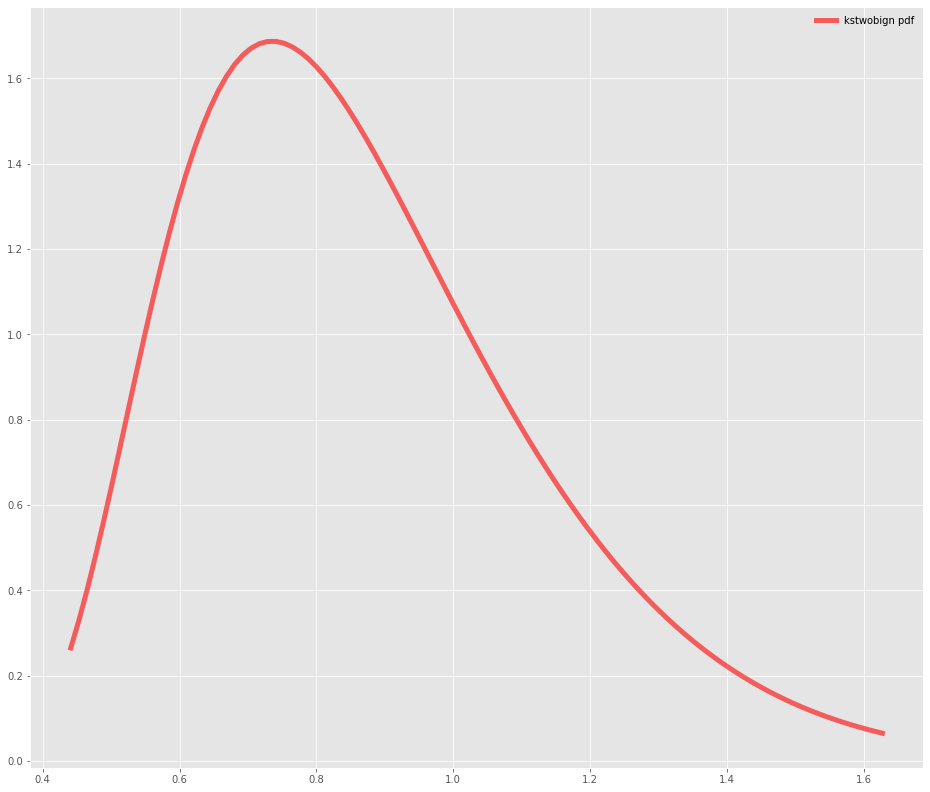

In [98]:
# 刻度Kolmogorov-Smirnov双侧检验统计量的极限分布。

from scipy.stats import kstwobign
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = kstwobign.stats(moments='mvsk')

x = np.linspace(kstwobign.ppf(0.01),
                kstwobign.ppf(0.99), 100)
ax.plot(x, kstwobign.pdf(x),
       'r-', lw=5, alpha=0.6, label='kstwobign pdf')
ax.legend(loc='best', frameon=False)
plt.show()

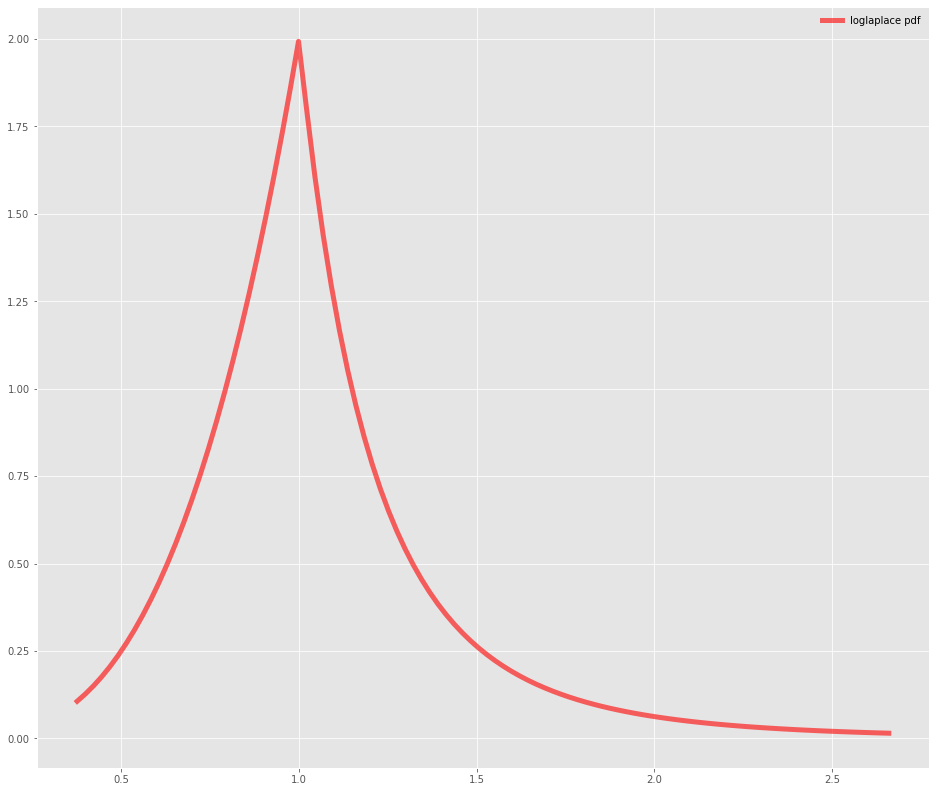

In [102]:
# 对数拉普拉斯连续型随机变量。

from scipy.stats import loglaplace
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = 4
mean, var, skew, kurt = loglaplace.stats(c, moments='mvsk')


x = np.linspace(loglaplace.ppf(0.01, c),
                loglaplace.ppf(0.99, c), 100)
ax.plot(x, loglaplace.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='loglaplace pdf')

ax.legend(loc='best', frameon=False)
plt.show()

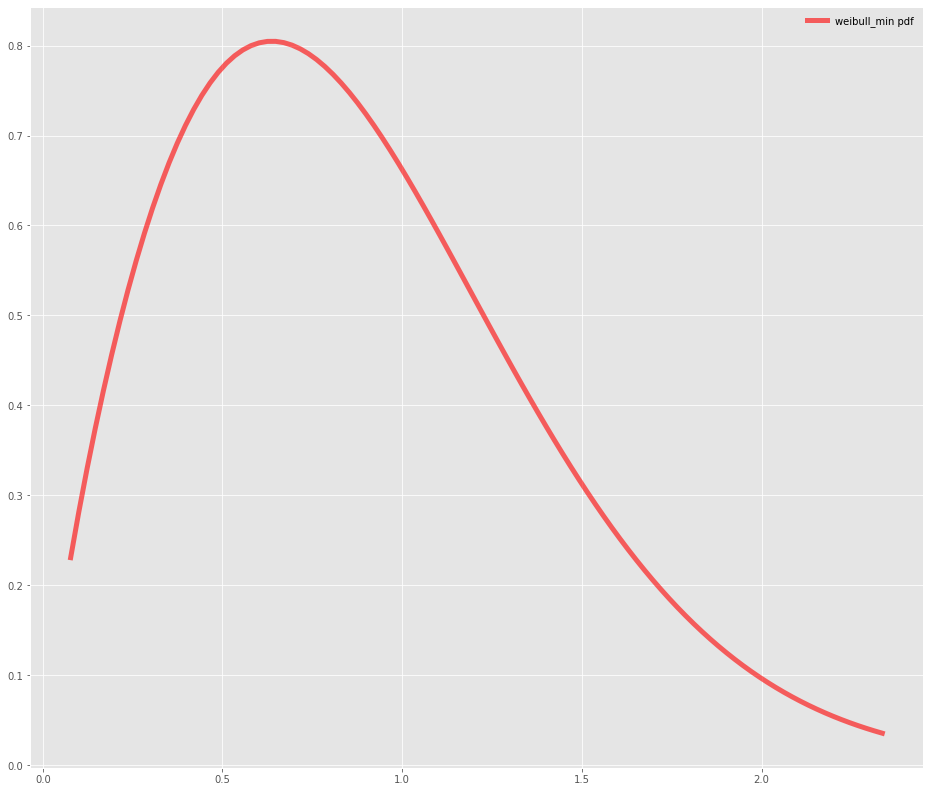

In [106]:
# 威布尔最小连续随机变量。

from scipy.stats import weibull_min
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = 1.8
mean, var, skew, kurt = weibull_min.stats(c, moments='mvsk')

x = np.linspace(weibull_min.ppf(0.01, c),
                weibull_min.ppf(0.99, c), 100)
ax.plot(x, weibull_min.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='weibull_min pdf')

ax.legend(loc='best', frameon=False)
plt.show()

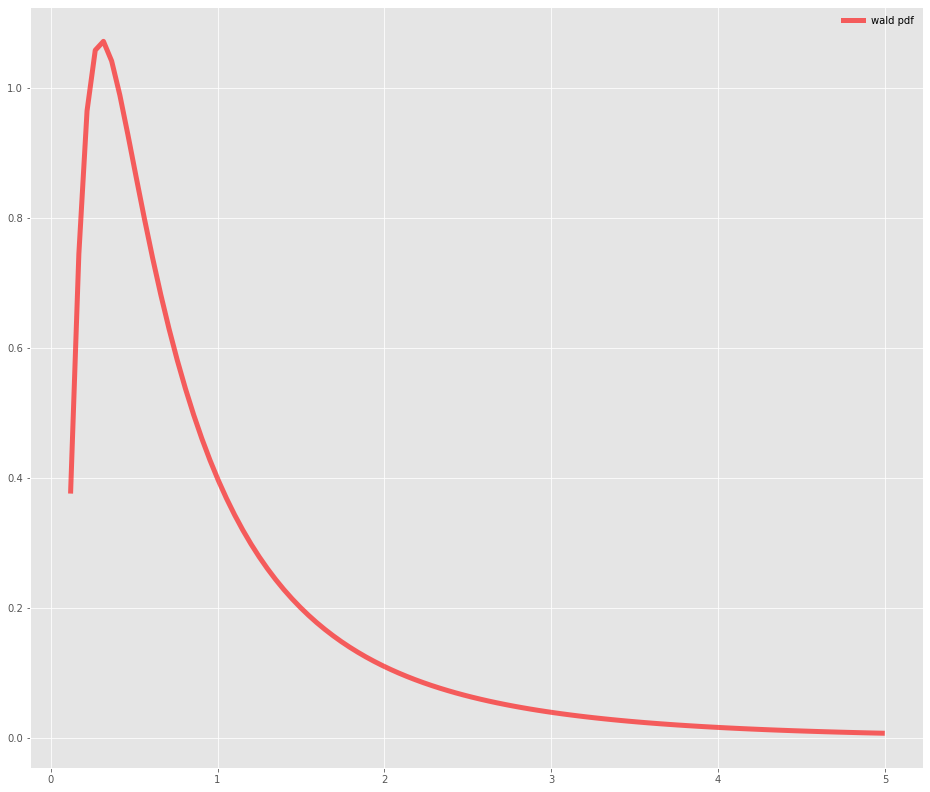

In [107]:
# 沃尔德连续随机变量。
from scipy.stats import wald
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = wald.stats(moments='mvsk')

x = np.linspace(wald.ppf(0.01),
                wald.ppf(0.99), 100)
ax.plot(x, wald.pdf(x),
       'r-', lw=5, alpha=0.6, label='wald pdf')

ax.legend(loc='best', frameon=False)
plt.show()

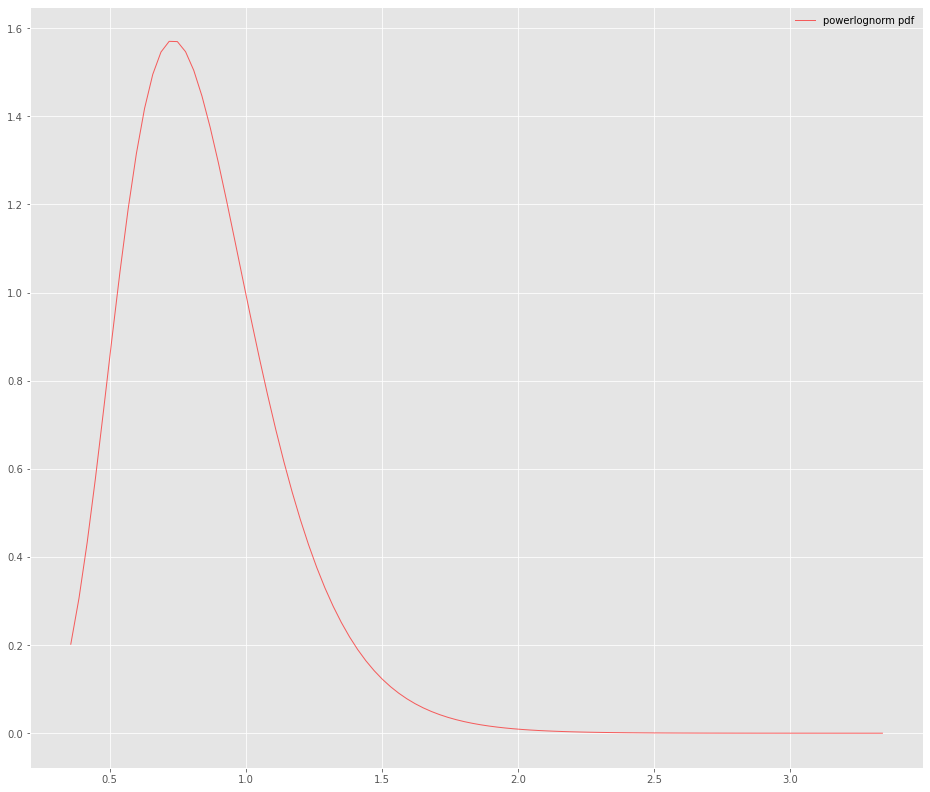

In [128]:
# 幂对数正态连续随机变量。

from scipy.stats import powerlognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c, s = 2, 0.4
mean, var, skew, kurt = powerlognorm.stats(c, s, moments='mvsk')

x = np.linspace(powerlognorm.ppf(0.01, c, s),
                2* powerlognorm.ppf(0.99, c, s), 100)
ax.plot(x, powerlognorm.pdf(x, c, s),
       'r-', lw=1, alpha=0.6, label='powerlognorm pdf')

ax.legend(loc='best', frameon=False)
plt.show()

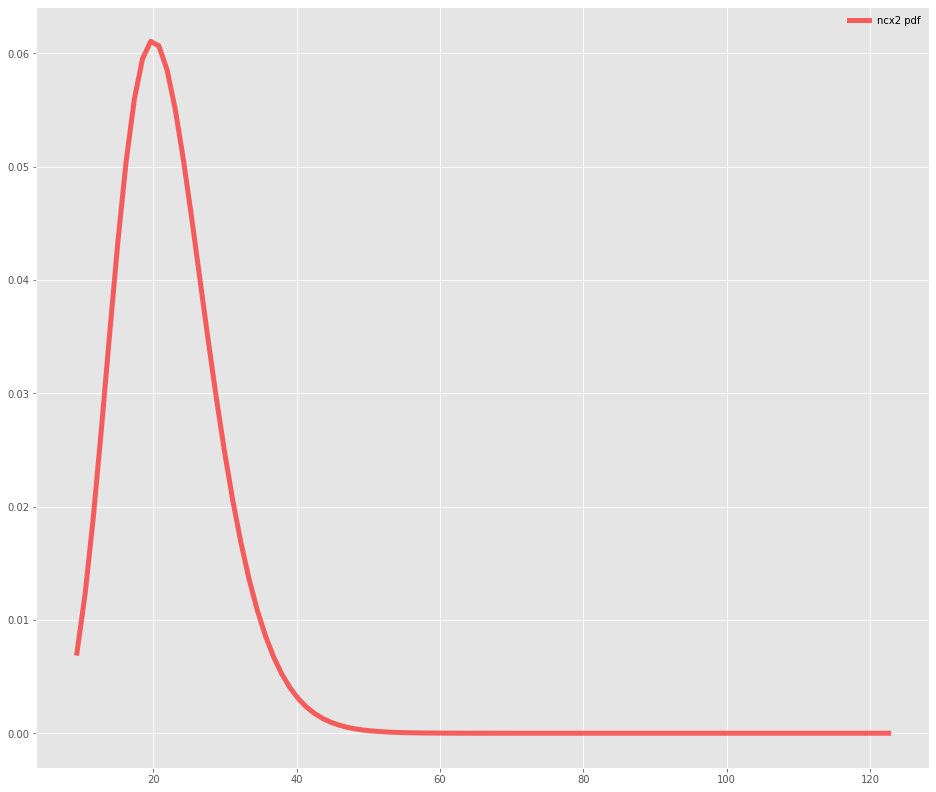

In [129]:
# 非中心卡方连续型随机变量。
from scipy.stats import ncx2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df, nc = 21, 1.06
mean, var, skew, kurt = ncx2.stats(df, nc, moments='mvsk')

x = np.linspace(ncx2.ppf(0.01, df, nc),
               3 * ncx2.ppf(0.99, df, nc), 100)
ax.plot(x, ncx2.pdf(x, df, nc),
       'r-', lw=5, alpha=0.6, label='ncx2 pdf')

ax.legend(loc='best', frameon=False)
plt.show()

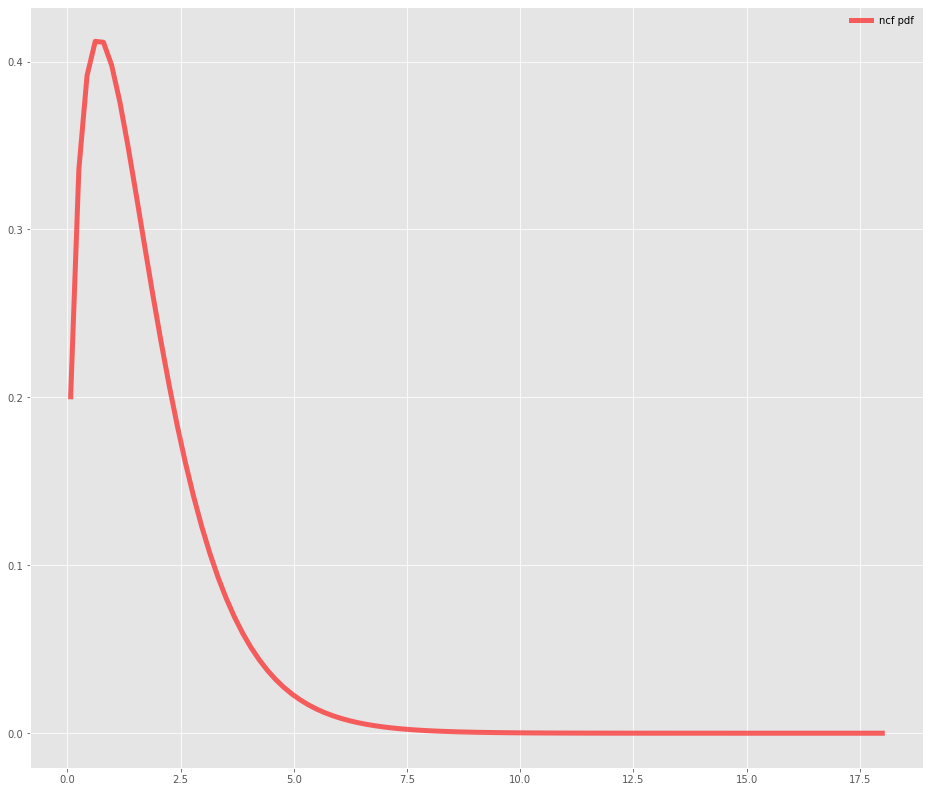

In [138]:
# 非中心F分布连续型随机变量。
from scipy.stats import ncf
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

dfn, dfd, nc = 3, 120,2
mean, var, skew, kurt = ncf.stats(dfn, dfd, nc, moments='mvsk')

x = np.linspace(ncf.ppf(0.01, dfn, dfd, nc),
                3 *  ncf.ppf(0.99, dfn, dfd, nc), 100)
ax.plot(x, ncf.pdf(x, dfn, dfd, nc),
       'r-', lw=5, alpha=0.6, label='ncf pdf')

ax.legend(loc='best', frameon=False)
plt.show()

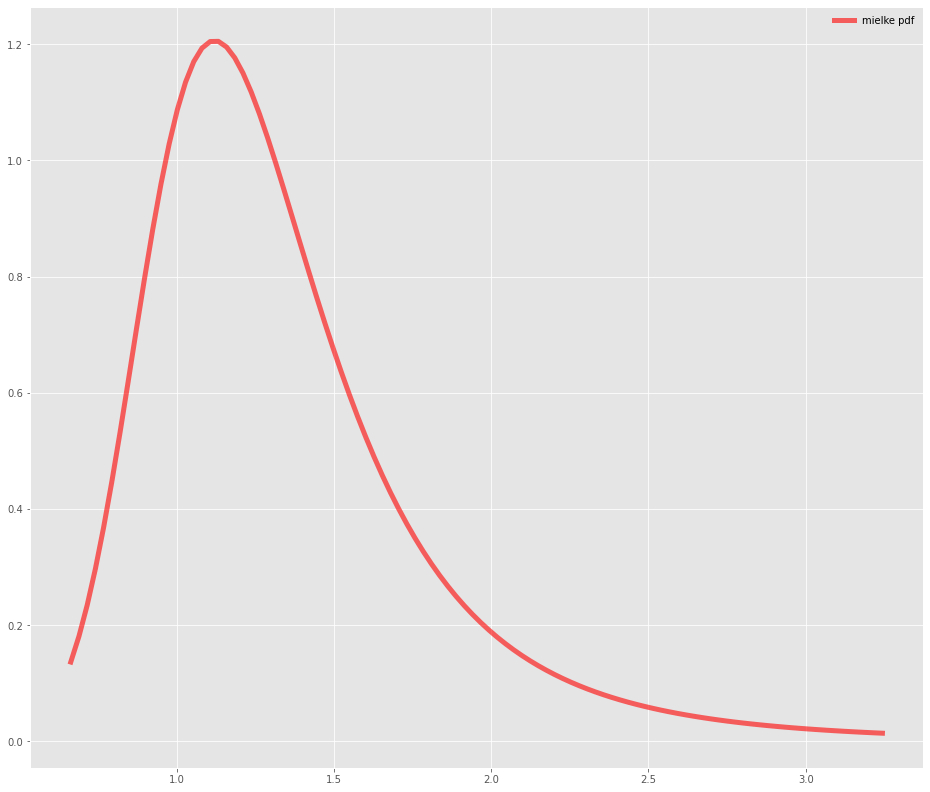

In [116]:
# 一个Mielke Beta-Kappa/Dagum连续随机变量。

from scipy.stats import mielke
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

k, s = 10.4, 4.6
mean, var, skew, kurt = mielke.stats(k, s, moments='mvsk')

x = np.linspace(mielke.ppf(0.01, k, s),
                mielke.ppf(0.99, k, s), 100)
ax.plot(x, mielke.pdf(x, k, s),
       'r-', lw=5, alpha=0.6, label='mielke pdf')

ax.legend(loc='best', frameon=False)
plt.show()

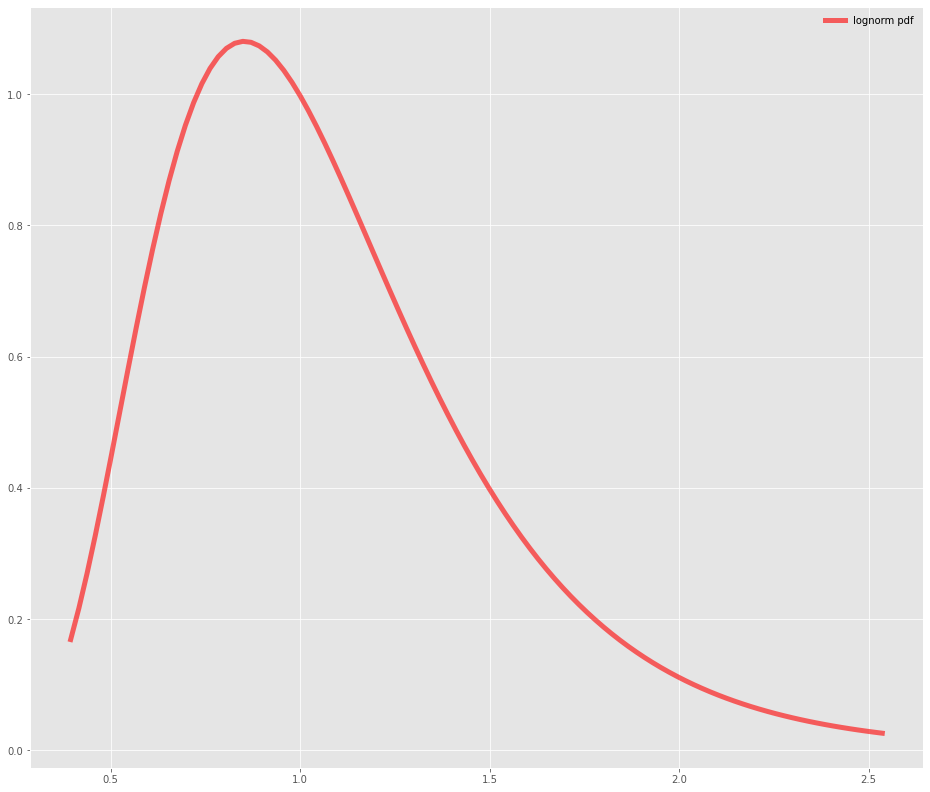

In [139]:
# 对数正态连续随机变量。

from scipy.stats import lognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

s = 0.4
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')

ax.legend(loc='best', frameon=False)
plt.show()

-4.791592893825466
28.151376574864955


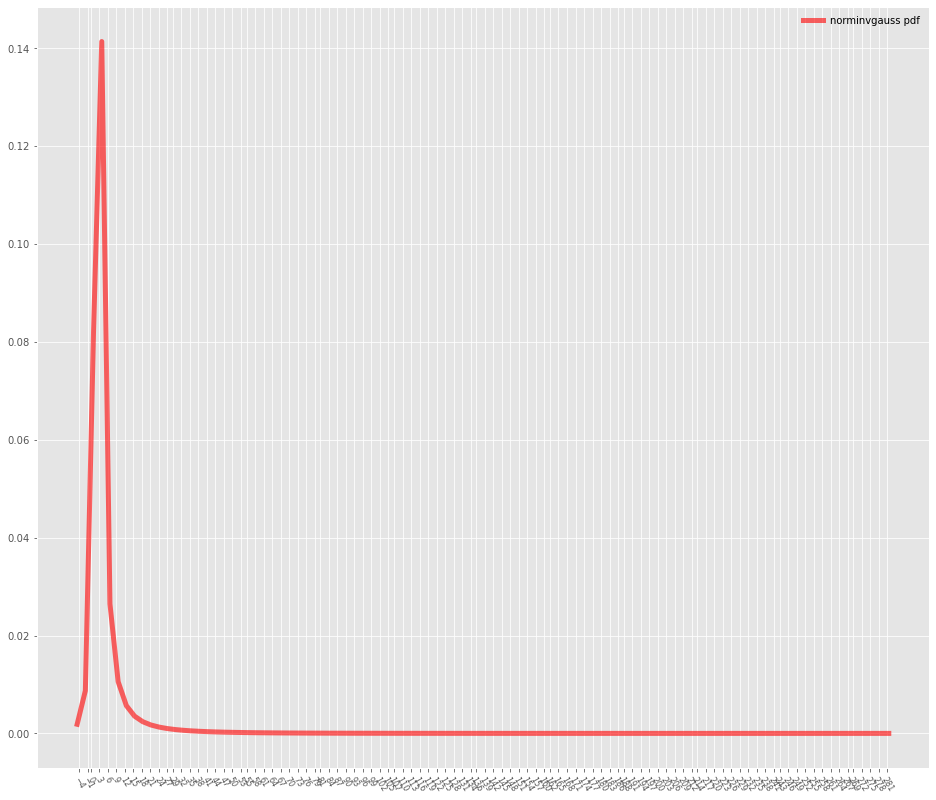

[[ 4.36890093e+00  3.29355505e+00  2.97872130e+00  2.07220823e+00
   1.89744656e+00  3.32468990e+00  3.37493159e+00  3.03423703e+00
   2.82652214e-01  3.68169843e+00  2.43877123e+00  1.94063541e+00
   2.05599017e+00  2.45957022e+00  4.00705857e+00  3.95990405e+00
   2.52962199e+00  3.65383511e+00  9.06741050e+00  2.73931434e+00]
 [ 9.38501288e+00  1.16546685e+00  3.57858560e+00  3.14555582e+00
   2.38304023e+00 -3.06145337e+00  9.53646354e+00  2.17215902e+00
   1.56488561e+01  5.81588650e+00  1.69909498e+00 -1.48401707e+00
  -1.57462681e+00  3.30867713e+00  2.68489107e+00  3.14742040e+00
   1.95771288e+01 -1.95138306e+00  1.37147586e+01  1.32828696e+01]
 [ 4.33872583e+00  5.63636084e+00  4.76846835e+00  3.04329690e+00
   1.83055569e+00  2.39685987e+00  4.93121918e+00  5.10289298e+00
   2.82815761e+01  1.67855142e+00  8.04686285e-01  2.42770528e+00
   6.24294899e+01  2.37617605e+00  1.39553561e+00 -5.82763779e-01
   5.77223365e+00  9.00600797e+00  2.40772921e+00  2.57593869e+00]
 [ 2.90

In [2]:
# 正态逆高斯连续随机变量。

from scipy.stats import norminvgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# a, b = 21.1587, 20.1171
# a, b, loc, scale = 21.158, 21.117, 0.260, 16.007    # hellovpn真实数据拟合
# a, b, loc, scale = 61.698, 61.554,-4.066, 6.908   # r888  384渠道拟合
a, b, loc, scale = 0.15574969996154991, 0.13112261910415027, 2.5570801541517517, 1.1505788503766108
mean, var, skew, kurt = norminvgauss.stats(a, b, moments='mvsk')
print(norminvgauss.ppf(0.01, a, b))
print(norminvgauss.ppf(0.99, a, b))
x = np.linspace(norminvgauss.ppf(0.01, a, b),
                10 * norminvgauss.ppf(0.99, a, b), 100)
ax.plot(x, norminvgauss.pdf(x, a, b, loc=loc, scale=scale),
       'r-', lw=5, alpha=0.6, label='norminvgauss pdf')

plt.xticks([int(_x) for _x in x], rotation=300, size=8)
ax.legend(loc='best', frameon=False)
plt.show()
print(norminvgauss.rvs(a, b, loc=loc, scale=scale, size=(20,20)))

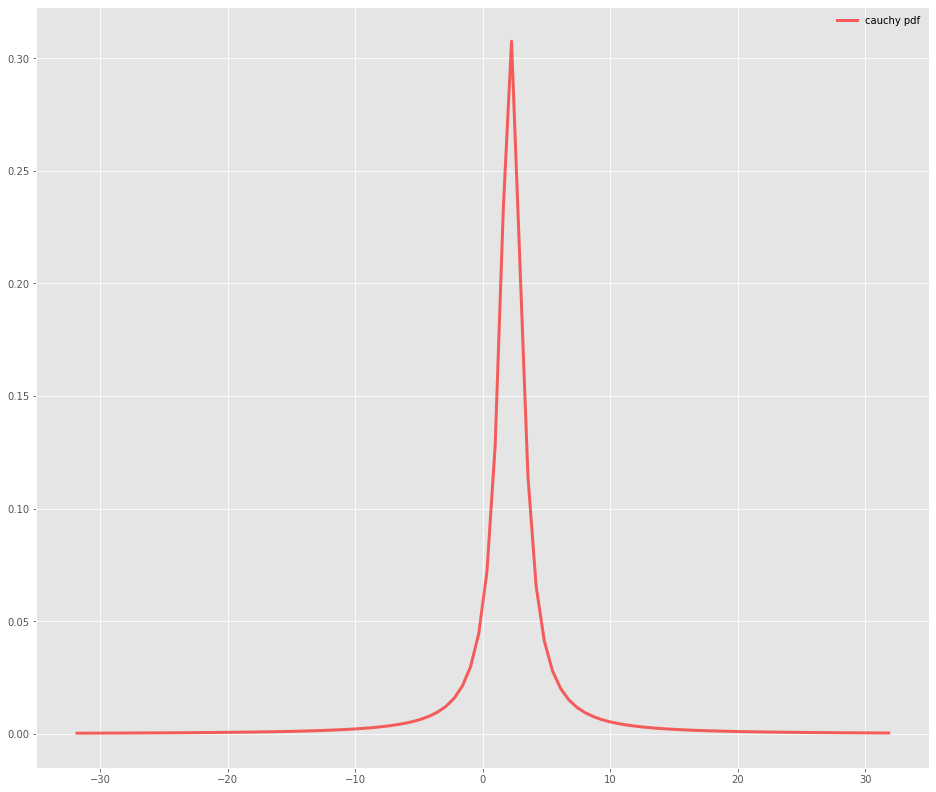

In [174]:
# 柯西连续型随机变量。

from scipy.stats import cauchy
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

loc = 2.191370806750376
scale = 1.0320590932798825
mean, var, skew, kurt = cauchy.stats(moments='mvsk')

x = np.linspace(cauchy.ppf(0.01),
                cauchy.ppf(0.99), 100)
ax.plot(x, cauchy.pdf(x, loc=loc, scale=scale),
       'r-', lw=3, alpha=0.6, label='cauchy pdf')

ax.legend(loc='best', frameon=False)
plt.show()

## t分布：
from scipy.stats import t   
概率密度函数：   
t.pdf(x, n)     　　　　　 # 返回t(n)的概率密度函数在x处的值   
概率分布函数：   
t.cdf(x, n)      　　　　　# 返回t(n)的概率密度函数在负无穷到x上的积分，也就是概率分布函数的值   
t.sf(x, n)      　　　　　 # 返回 1 - t.cdf(x, n)   
数学期望：   
t.expect( func = f , args=(n,) ) 　　　　　# 返回f(x)的期望   
分位数：   
t.isf(1-alpha, n)　　　　　# 返回值s满足：t.cdf(s, n) = alpha，  s就是alpha分位数   
t.ppf(alpha, n)  　　　　　# 返回值s满足：t.cdf(s, n) = alpha，  s就是alpha分位数   
分布的数量关系：   
t.mean(n)        　　　　　# t(n) 的均值   
t.var(n)         　　　　　# t(n) 的方差   
t.std(n)         　　　　　# t(n) 的方差再开平方根   
t.median(n)      　　　　　# t(n) 的中位数   
t.moment(a,n)    　　　　　# t(n) 的 a 阶原点矩   